In [1]:
# OS operations to change current working directory.
import os 
path = os.getcwd()
path

'C:\\Users\\FURKANG'

In [2]:
os.chdir(r"C:\Users\FURKANG\Desktop\BurgerProject\data")
os.getcwd()

'C:\\Users\\FURKANG\\Desktop\\BurgerProject\\data'

In [3]:
# Importing necessary libraries.
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import datetime as dt
import os 
import glob
from matplotlib import style
style.use("ggplot")

In [4]:
def data_import():
    """ This function imports data from current working directory and returns a dictionary which 
    have restaurant names as keys and restaurant sales data in dataframe format."""
    files = glob.glob("*.csv")
    print(files)
    names = [os.path.basename(x) for x in glob.glob("*.csv")]
    print(names)
    dataframe_dict = {}
    for i in range(len(files)):
        dataframe = pd.read_csv(files[i])
        dataframe_dict.update({names[i]:dataframe})
    return dataframe_dict

In [5]:
data = data_import()
data.keys()

['acibadem.csv', 'altiyol.csv', 'bahariye.csv', 'caddebostan.csv', 'muhurdar.csv']
['acibadem.csv', 'altiyol.csv', 'bahariye.csv', 'caddebostan.csv', 'muhurdar.csv']


dict_keys(['acibadem.csv', 'altiyol.csv', 'bahariye.csv', 'caddebostan.csv', 'muhurdar.csv'])

In [6]:
len(data)

5

In [7]:
type(data["caddebostan.csv"])

pandas.core.frame.DataFrame

In [8]:
# check dataframes.
for i in data.keys():
    print(data[i].head(3))

   FKItemId           DateOfBusiness  FKOrderModeId            LongName  Hour  \
0     10001  2015-09-01 00:00:00.000              4        WHOPPER MENU     0   
1     40015  2015-09-01 00:00:00.000              2        CHEESEBURGER     0   
2     20007  2015-09-01 00:00:00.000              4  CHEESE BURGER MENU     0   

   Minute Price  Quantity DiscPric  FKStoreId  
0      17  13,5         1     13,5        102  
1      37  6,75         2     13,5        102  
2      11  7,75         1     7,75        102  
   FKItemId           DateOfBusiness  FKOrderModeId            LongName  Hour  \
0     20026  2015-09-01 00:00:00.000              4  YENI BIG KING MENU     0   
1     20026  2015-09-01 00:00:00.000              4  YENI BIG KING MENU     0   
2     20026  2015-09-01 00:00:00.000              4  YENI BIG KING MENU     0   

   Minute Price  Quantity DiscPric  FKStoreId  
0       7  12,5         3     37,5        223  
1      16  12,5         2       25        223  
2      29  12,

In [9]:
def EDA(dataframe):
    """ This is a simple Exploratory Data Analysis (EDA) function which gives information about 
    dataframe shape, column datatypes, dataframe statistics and number of missing values."""
    print(dataframe.shape)
    print(dataframe.info())
    print(dataframe.describe())
    print(dataframe.isnull().sum())    
    # print(dataframe.head())

In [10]:
def processing_data(dataframe):
    """ This function do many operations in order to make data ready for further investigation. 
    It changes some column datatypes, it manupilates some columns to create new ones, it changes some column names, 
    drop some columns, creates index and sort that index etc. It returns an analysis-ready dataframe. """
    dataframe2 = dataframe.copy()
    dataframe2["Date"] = pd.to_datetime(dataframe["DateOfBusiness"])
    dataframe2 = dataframe2.rename(columns = {"DiscPric" : "Total", "LongName":"BurgerMenu"})
    dataframe2["Total"] = dataframe2["Total"].astype(str)
    dataframe2["Price"] = dataframe2["Price"].astype(str)
    list1 = []
    for i in dataframe2["Total"]:
        list1.append(i.replace(",","."))
    dataframe2["Total_"] = pd.Series(list1)
    list2 = [] 
    for i in dataframe2["Price"]:
        list2.append(i.replace(",","."))
    dataframe2["Unit_Price"] = pd.Series(list2)
    dataframe2.drop(["Total", "Price"], axis = 1 , inplace = True)
    dataframe2["Total"] = dataframe2["Total_"].astype("float")
    dataframe2["UnitPrice"] = dataframe2["Unit_Price"].astype("float")
    dataframe2.drop(["Total_", "Unit_Price"], axis = 1, inplace = True)
    dataframe2["hour"] = dataframe2["Hour"].astype(str)
    dataframe2["minute"] = dataframe2["Minute"].astype(str)
    dataframe2.drop(["Hour", "Minute"], axis = 1, inplace = True)
    dataframe2["Hour_Minute_"] = dataframe2["hour"].str.cat(dataframe2["minute"], sep = "-")
    dataframe2["Date2"] = dataframe2["Date"].astype(str)
    dataframe2["Date_Hour_Minute"] = dataframe2["Date2"].str.cat(dataframe2["Hour_Minute_"], sep = "-")
    dataframe2["Date__"] = pd.to_datetime(dataframe2["Date_Hour_Minute"], format = "%Y-%m-%d-%H-%M")
    dataframe2.drop(["Hour_Minute_", "Date2", "Date_Hour_Minute"], axis = 1, inplace = True)
    dataframe3 = dataframe2.rename(columns = {"Date__" : "Date_Index"})
    dataframe4 = dataframe3.set_index("Date_Index")
    dataframe4 = dataframe4.sort_index()
    dataframe4["minute"] = dataframe4["minute"].astype(int)
    dataframe4 = dataframe4["2015-09-07":"2017-12-03"]
    dataframe5 = dataframe4.copy()
    dataframe5["half_hour"] = dataframe4["minute"] // 30
    print(dataframe5.head())
    return dataframe5

In [11]:
# Lets store analysis ready dataframes in another dictionary. This is not recommended for bigger dataframes or when we have
# multiple dataframes due to the memory constraints but here we can store it.
processed_data = {}
for i in data.keys():
    processed_data.update({ i : processing_data(data[i]) } )

                     FKItemId           DateOfBusiness  FKOrderModeId  \
Date_Index                                                              
2015-09-07 00:05:00     99922  2015-09-07 00:00:00.000              4   
2015-09-07 00:06:00     99128  2015-09-07 00:00:00.000              4   
2015-09-07 00:07:00     99922  2015-09-07 00:00:00.000              4   
2015-09-07 00:08:00     99951  2015-09-07 00:00:00.000              2   
2015-09-07 00:12:00     10018  2015-09-07 00:00:00.000              2   

                                    BurgerMenu  Quantity  FKStoreId  \
Date_Index                                                            
2015-09-07 00:05:00  2LI DB KOFTEBURGER MN KMP         1        102   
2015-09-07 00:06:00      EK CHICKEN ROYAL MENU         1        102   
2015-09-07 00:07:00  2LI DB KOFTEBURGER MN KMP         1        102   
2015-09-07 00:08:00  3KISILIK MEGA AVANT MNSPC         1        102   
2015-09-07 00:12:00         BK STEAKHOUSE MENU         1      

In [12]:
processed_data.keys()

dict_keys(['acibadem.csv', 'altiyol.csv', 'bahariye.csv', 'caddebostan.csv', 'muhurdar.csv'])

In [13]:
caddebostan = processed_data["caddebostan.csv"]

In [14]:
EDA(caddebostan)

(532743, 12)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 532743 entries, 2015-09-07 00:07:00 to 2017-12-03 23:59:00
Data columns (total 12 columns):
FKItemId          532743 non-null int64
DateOfBusiness    532743 non-null object
FKOrderModeId     532743 non-null int64
BurgerMenu        532743 non-null object
Quantity          532743 non-null int64
FKStoreId         532743 non-null int64
Date              532743 non-null datetime64[ns]
Total             532743 non-null float64
UnitPrice         532743 non-null float64
hour              532743 non-null object
minute            532743 non-null int32
half_hour         532743 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 68.8+ MB
None
            FKItemId  FKOrderModeId       Quantity  FKStoreId          Total  \
count  532743.000000  532743.000000  532743.000000   532743.0  532743.000000   
mean    43121.813075       2.811911       1.212087       78.0      17.250811   
std     3

In [15]:
caddebostan.head()

,FKItemId,DateOfBusiness,FKOrderModeId,BurgerMenu,Quantity,FKStoreId,Date,Total,UnitPrice,hour,minute,half_hour
Date_Index,,,,,,,,,,,,
2015-09-07 00:07:00,20026,2015-09-07 00:00:00.000,4,YENI BIG KING MENU,1,78,2015-09-07,14.50,14.50,0,7,0
2015-09-07 00:09:00,99921,2015-09-07 00:00:00.000,4,2 LI KOFTEBURGER MENU KMP,1,78,2015-09-07,14.50,14.50,0,9,0
2015-09-07 00:18:00,20038,2015-09-07 00:00:00.000,4,EXTRA BURGER KLASIK MENU,2,78,2015-09-07,40.00,20.00,0,18,0
2015-09-07 00:27:00,10001,2015-09-07 00:00:00.000,4,WHOPPER MENU,1,78,2015-09-07,15.50,15.50,0,27,0
2015-09-07 00:30:00,10023,2015-09-07 00:00:00.000,4,KING CHICKEN MENU,1,78,2015-09-07,7.75,7.75,0,30,1


In [16]:
# This groupby function can manupilate Total sales data in given order. We can get half-hourly sales figure by this function.
seri = caddebostan.groupby(["Date", "hour", "half_hour"])["Total"].sum()
seri[0:10]

Date        hour  half_hour
2015-09-07  0     0             84.50
                  1             74.25
            1     0            147.50
                  1             75.00
            11    0             14.50
                  1             87.20
            12    0            291.15
                  1            249.40
            13    0            335.70
                  1            334.95
Name: Total, dtype: float64

In [17]:
seri[10:20]

Date        hour  half_hour
2015-09-07  14    0            314.95
                  1            282.75
            15    0            538.95
                  1            337.85
            16    0            480.85
                  1            321.20
            17    0            327.70
                  1            266.60
            18    0            449.75
                  1            675.95
Name: Total, dtype: float64

In [18]:
# Lets see what is our grouped by object's index and how many levels it has. 
seri.index.levels

FrozenList([[2015-09-07 00:00:00, 2015-09-08 00:00:00, 2015-09-09 00:00:00, 2015-09-10 00:00:00, 2015-09-11 00:00:00, 2015-09-12 00:00:00, 2015-09-13 00:00:00, 2015-09-14 00:00:00, 2015-09-15 00:00:00, 2015-09-16 00:00:00, 2015-09-17 00:00:00, 2015-09-18 00:00:00, 2015-09-19 00:00:00, 2015-09-20 00:00:00, 2015-09-21 00:00:00, 2015-09-22 00:00:00, 2015-09-23 00:00:00, 2015-09-24 00:00:00, 2015-09-25 00:00:00, 2015-09-26 00:00:00, 2015-09-27 00:00:00, 2015-09-28 00:00:00, 2015-09-29 00:00:00, 2015-09-30 00:00:00, 2015-10-01 00:00:00, 2015-10-02 00:00:00, 2015-10-03 00:00:00, 2015-10-04 00:00:00, 2015-10-05 00:00:00, 2015-10-06 00:00:00, 2015-10-07 00:00:00, 2015-10-08 00:00:00, 2015-10-09 00:00:00, 2015-10-10 00:00:00, 2015-10-11 00:00:00, 2015-10-12 00:00:00, 2015-10-13 00:00:00, 2015-10-14 00:00:00, 2015-10-15 00:00:00, 2015-10-16 00:00:00, 2015-10-17 00:00:00, 2015-10-18 00:00:00, 2015-10-19 00:00:00, 2015-10-20 00:00:00, 2015-10-21 00:00:00, 2015-10-22 00:00:00, 2015-10-23 00:00:00, 

In [19]:
len(seri.index.levels)

3

In [21]:
# lets see 13th day index. ( Python is 0-indexed )
seri.index.levels[0][12]

Timestamp('2015-09-19 00:00:00')

In [22]:
# Lets see how many days our dataframe includes.
len(seri.index.levels[0])

819

In [23]:
# Half-hourly sales figure for the 153th day (since Python is 0-indexed).
seri[seri.index.levels[0][152]]

hour  half_hour
0     0            161.00
      1            168.40
1     0             20.95
      1              5.75
11    0            150.30
      1             80.65
12    0            119.65
      1            312.35
13    0            346.00
      1            342.05
14    0            281.20
      1            384.05
15    0            366.55
      1            300.70
16    0            432.00
      1            479.45
17    0            144.90
      1            273.70
18    0            316.85
      1            527.05
19    0            432.40
      1            438.30
20    0            462.90
      1            286.90
21    0            447.90
      1            191.15
22    0            291.25
      1            378.50
23    0            327.85
      1            236.50
Name: Total, dtype: float64

In [38]:
# Lets create another dictionary which has days as keys and half-hourly sales figure as values.
dict_daily = {}
for i in range(len(seri.index.levels[0])):
    dict_daily.update({ seri.index.levels[0][i] : seri[seri.index.levels[0][i]]} ) 
len(dict_daily)

819

In [39]:
# lets convert it to a dataframe.
daily_sales_hourly = pd.DataFrame.from_dict(dict_daily)

In [40]:
daily_sales_hourly.shape

(43, 819)

In [42]:
daily_sales_hourly.head(7)

2015-09-07  2015-09-08  2015-09-09  2015-09-10  2015-09-11  \
hour half_hour                                                               
0    0               84.50      225.65      323.95      189.75      282.50   
     1               74.25      157.00      202.70      215.25      266.50   
1    0              147.50      173.00      185.50      206.95      243.00   
     1               75.00       91.00      118.50      106.65      211.50   
10   0                 NaN         NaN         NaN         NaN         NaN   
     1                 NaN         NaN        5.75         NaN         NaN   
11   0               14.50       20.75       37.00         NaN        7.75   

                2015-09-12  2015-09-13  2015-09-14  2015-09-15  2015-09-16  \
hour half_hour                                                               
0    0              234.25       86.25       48.00      246.25      184.50   
     1              295.65      146.25      446.75      272.75      126.25   
1    0              212.00      101.00      126.25       99.00      132.75   
     1              123.50      100.00       11.50      182.40       71.00   
10   0                 NaN         NaN         NaN         NaN         NaN   
     1               10.50         NaN         NaN       73.00         NaN   
11   0               48.00       20.75       21.00       55.25       14.50   

                   ...      2017-11-24  2017-11-25  2017-11-26  2017-11-27  \
hour half_hour     ...                                                       
0    0             ...           94.50      248.50      121.15      241.30   
     1             ...          209.25      172.85      577.85       85.45   
1    0             ...          101.30      266.20         NaN         NaN   
     1             ...          135.05      112.90       82.25         NaN   
10   0             ...             NaN         NaN         NaN         NaN   
     1             ...            9.95       10.95       50.95         NaN   
11   0             ...             NaN      141.45      112.95         NaN   

                2017-11-28  2017-11-29  2017-11-30  2017-12-01  2017-12-02  \
hour half_hour                                                               
0    0              115.20      169.85       13.50      349.90      261.10   
     1              191.90       36.75       66.20      185.70      310.75   
1    0               43.00         NaN         NaN      127.70      108.90   
     1                 NaN         NaN         NaN       84.50      219.20   
10   0               16.50         NaN         NaN       16.50       28.85   
     1                 NaN       39.50         NaN         NaN       25.00   
11   0               66.25         NaN       52.75       54.25       18.90   

                2017-12-03  
hour half_hour              
0    0              180.05  
     1              330.30  
1    0               80.00  
     1                 NaN  
10   0                 NaN  
     1                 NaN  
11   0                 NaN  

[7 rows x 819 columns]

In [43]:
# There are some problems with daily_sales_hourly dataframe, below operations are required for better evaluation.
daily_sales_hourly2 = daily_sales_hourly.fillna(0)
daily_sales_hourly3 = daily_sales_hourly2.reset_index()

In [44]:
# If we want to write this to a csv file for storage purposes.
daily_sales_hourly3.to_csv("caddebostan_daily_sales_per_half_hour.csv")

In [45]:
daily_sales_hourly3.columns

Index([             'hour',         'half_hour', 2015-09-07 00:00:00,
       2015-09-08 00:00:00, 2015-09-09 00:00:00, 2015-09-10 00:00:00,
       2015-09-11 00:00:00, 2015-09-12 00:00:00, 2015-09-13 00:00:00,
       2015-09-14 00:00:00,
       ...
       2017-11-24 00:00:00, 2017-11-25 00:00:00, 2017-11-26 00:00:00,
       2017-11-27 00:00:00, 2017-11-28 00:00:00, 2017-11-29 00:00:00,
       2017-11-30 00:00:00, 2017-12-01 00:00:00, 2017-12-02 00:00:00,
       2017-12-03 00:00:00],
      dtype='object', length=821)

In [46]:
daily_sales_hourly3.head(7)

,hour,half_hour,2015-09-07 00:00:00,2015-09-08 00:00:00,2015-09-09 00:00:00,2015-09-10 00:00:00,2015-09-11 00:00:00,2015-09-12 00:00:00,2015-09-13 00:00:00,2015-09-14 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,0,0,84.50,225.65,323.95,189.75,282.50,234.25,86.25,48.00,...,94.50,248.50,121.15,241.30,115.20,169.85,13.50,349.90,261.10,180.05
1,0,1,74.25,157.00,202.70,215.25,266.50,295.65,146.25,446.75,...,209.25,172.85,577.85,85.45,191.90,36.75,66.20,185.70,310.75,330.30
2,1,0,147.50,173.00,185.50,206.95,243.00,212.00,101.00,126.25,...,101.30,266.20,0.00,0.00,43.00,0.00,0.00,127.70,108.90,80.00
3,1,1,75.00,91.00,118.50,106.65,211.50,123.50,100.00,11.50,...,135.05,112.90,82.25,0.00,0.00,0.00,0.00,84.50,219.20,0.00
4,10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,16.50,0.00,0.00,16.50,28.85,0.00
5,10,1,0.00,0.00,5.75,0.00,0.00,10.50,0.00,0.00,...,9.95,10.95,50.95,0.00,0.00,39.50,0.00,0.00,25.00,0.00
6,11,0,14.50,20.75,37.00,0.00,7.75,48.00,20.75,21.00,...,0.00,141.45,112.95,0.00,66.25,0.00,52.75,54.25,18.90,0.00


In [47]:
daily_sales_hourly3.shape[1]

821

In [48]:
# Below operations calculate difference between last week sales and today sales. 
dict_diff = {} 
for i in range(daily_sales_hourly3.shape[1]-9):
    dict_diff.update( {daily_sales_hourly3.columns[i+9] : daily_sales_hourly3.iloc[:, i+9] - daily_sales_hourly3.iloc[:, i+2] })

In [49]:
len(dict_diff)

812

In [50]:
caddebostan_hourly_difference = pd.DataFrame.from_dict(dict_diff)

In [51]:
caddebostan_hourly_difference.head()

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,-36.50,20.60,-139.45,-22.30,79.25,296.90,292.75,113.75,16.75,75.45,...,10.8,-53.30,-20.05,97.90,43.95,-113.55,-120.45,255.40,12.60,58.90
1,372.50,115.75,-76.45,39.75,72.50,185.55,-4.00,-227.50,4.00,4.00,...,47.3,-214.75,460.60,26.75,73.95,-41.85,-9.05,-23.55,137.90,-247.55
2,-21.25,-74.00,-52.75,-153.20,183.40,206.50,205.70,-88.75,-14.25,-132.75,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,-157.30,80.00
3,-63.50,91.40,-47.50,11.85,-112.10,34.85,-72.50,88.25,-127.90,-71.00,...,-1.1,-51.75,82.25,0.00,0.00,0.00,0.00,-50.55,106.30,-82.25
4,0.00,0.00,0.00,0.00,0.00,0.00,27.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,16.50,-45.50,0.00,16.50,28.85,0.00


In [52]:
# again we write this dataframe to a csv for storage purposes. 
# NOTE : In that "CSV", I manually manupilated index by looking through the "daily_sales_hourly3" since it lost when we 
# calculated the difference.
# You can observe it in the cadde_diff dataframe below.
caddebostan_hourly_difference.to_csv("Caddebostan_difference_daily_base.csv")

In [55]:
cadde_diff = pd.read_csv("Caddebostan_difference_daily_base.csv")

In [56]:
cadde_diff.head()

,Unnamed: 0,hour,half_hour,9/14/2015,9/15/2015,9/16/2015,9/17/2015,9/18/2015,9/19/2015,9/20/2015,...,11/24/2017,11/25/2017,11/26/2017,11/27/2017,11/28/2017,11/29/2017,11/30/2017,12/1/2017,12/2/2017,12/3/2017
0,0,0,0,-36.50,20.60,-139.45,-22.30,79.25,296.90,292.75,...,10.8,-53.30,-20.05,97.90,43.95,-113.55,-120.45,255.40,12.60,58.90
1,1,0,1,372.50,115.75,-76.45,39.75,72.50,185.55,-4.00,...,47.3,-214.75,460.60,26.75,73.95,-41.85,-9.05,-23.55,137.90,-247.55
2,2,1,0,-21.25,-74.00,-52.75,-153.20,183.40,206.50,205.70,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,-157.30,80.00
3,3,1,1,-63.50,91.40,-47.50,11.85,-112.10,34.85,-72.50,...,-1.1,-51.75,82.25,0.00,0.00,0.00,0.00,-50.55,106.30,-82.25
4,4,10,0,0.00,0.00,0.00,0.00,0.00,0.00,27.00,...,0.0,0.00,0.00,0.00,16.50,-45.50,0.00,16.50,28.85,0.00


In [57]:
# Lets create another dataframe which stores "absolute differences"
abs_diff_cadde = caddebostan_hourly_difference.abs()

In [58]:
abs_diff_cadde.head()

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,36.50,20.60,139.45,22.30,79.25,296.90,292.75,113.75,16.75,75.45,...,10.8,53.30,20.05,97.90,43.95,113.55,120.45,255.40,12.60,58.90
1,372.50,115.75,76.45,39.75,72.50,185.55,4.00,227.50,4.00,4.00,...,47.3,214.75,460.60,26.75,73.95,41.85,9.05,23.55,137.90,247.55
2,21.25,74.00,52.75,153.20,183.40,206.50,205.70,88.75,14.25,132.75,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,157.30,80.00
3,63.50,91.40,47.50,11.85,112.10,34.85,72.50,88.25,127.90,71.00,...,1.1,51.75,82.25,0.00,0.00,0.00,0.00,50.55,106.30,82.25
4,0.00,0.00,0.00,0.00,0.00,0.00,27.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,16.50,45.50,0.00,16.50,28.85,0.00


In [59]:
daily_sales_hourly3.head()

,hour,half_hour,2015-09-07 00:00:00,2015-09-08 00:00:00,2015-09-09 00:00:00,2015-09-10 00:00:00,2015-09-11 00:00:00,2015-09-12 00:00:00,2015-09-13 00:00:00,2015-09-14 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,0,0,84.50,225.65,323.95,189.75,282.5,234.25,86.25,48.00,...,94.50,248.50,121.15,241.30,115.2,169.85,13.5,349.9,261.10,180.05
1,0,1,74.25,157.00,202.70,215.25,266.5,295.65,146.25,446.75,...,209.25,172.85,577.85,85.45,191.9,36.75,66.2,185.7,310.75,330.30
2,1,0,147.50,173.00,185.50,206.95,243.0,212.00,101.00,126.25,...,101.30,266.20,0.00,0.00,43.0,0.00,0.0,127.7,108.90,80.00
3,1,1,75.00,91.00,118.50,106.65,211.5,123.50,100.00,11.50,...,135.05,112.90,82.25,0.00,0.0,0.00,0.0,84.5,219.20,0.00
4,10,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,16.5,0.00,0.0,16.5,28.85,0.00


In [60]:
# Let store daily_sales difference from the base as a percentage value.
diff_sales_pct = {}
for i in range(abs_diff_cadde.shape[1]):
    diff_to_sales_pct = abs_diff_cadde.iloc[:,i].sum() / daily_sales_hourly3.iloc[:, i+2].sum()
    diff_sales_pct.update( { abs_diff_cadde.columns[i] : diff_to_sales_pct })
    

In [62]:
seri_diff = pd.DataFrame.from_dict(diff_sales_pct, orient = "index", columns = ["difference_ratio_daily"])
seri_diff.head(10)

,difference_ratio_daily
2015-09-14,0.377584
2015-09-15,0.359586
2015-09-16,0.368412
2015-09-17,0.390758
2015-09-18,0.407340
2015-09-19,1.119006
2015-09-20,0.377313
2015-09-21,0.689863
2015-09-22,0.334621
2015-09-23,0.405186


In [63]:
pct_diff_stats = seri_diff.describe()

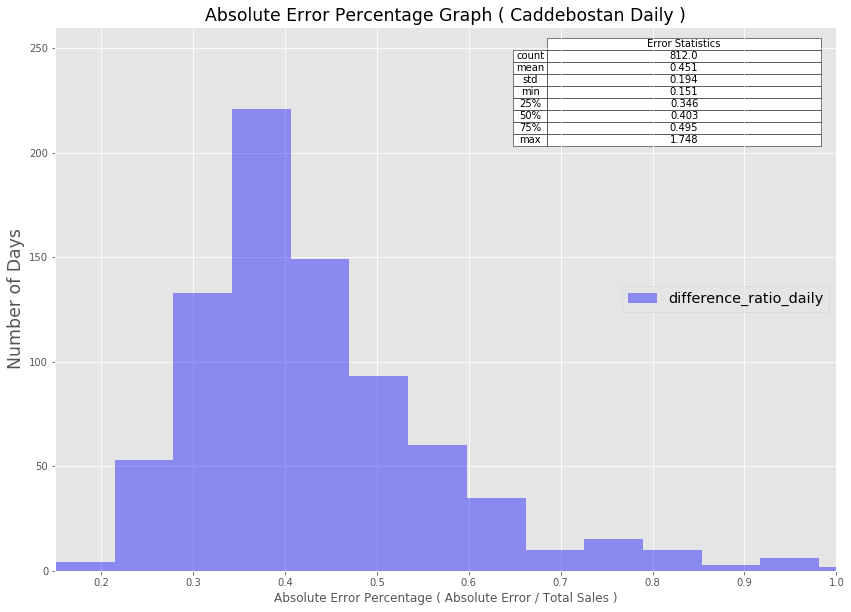

In [64]:
# Lets plot daily sales difference graph and use statistics table in the plot.

_ = seri_diff.plot.hist(color = "blue", bins = 25, figsize = (14,10), alpha = 0.4)
_ = plt.xlim(np.round(0.15,2), 1)
_ = plt.ylim(0, 260)
_ = plt.xlabel("Absolute Error Percentage ( Absolute Error / Total Sales )")
_ = plt.title("Absolute Error Percentage Graph ( Caddebostan Daily )", fontsize = "xx-large")
_ = plt.ylabel("Number of Days", fontsize = "xx-large")
_ = plt.table(cellText = np.round(pct_diff_stats.values,3),rowLabels= pct_diff_stats.index,colWidths = [0.35]*len(pct_diff_stats.columns),
          colLabels= ["Error Statistics"],
          cellLoc = 'center', rowLoc = 'center',
          loc='upper right')
_ = plt.legend(loc = "center right", fontsize = "x-large")
# we can save image below.
# plt.savefig("Abs_Error_PCT_Caddebostan.PNG")
plt.show()



In [65]:
abs_diff_cadde.head(5)

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,36.50,20.60,139.45,22.30,79.25,296.90,292.75,113.75,16.75,75.45,...,10.8,53.30,20.05,97.90,43.95,113.55,120.45,255.40,12.60,58.90
1,372.50,115.75,76.45,39.75,72.50,185.55,4.00,227.50,4.00,4.00,...,47.3,214.75,460.60,26.75,73.95,41.85,9.05,23.55,137.90,247.55
2,21.25,74.00,52.75,153.20,183.40,206.50,205.70,88.75,14.25,132.75,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,157.30,80.00
3,63.50,91.40,47.50,11.85,112.10,34.85,72.50,88.25,127.90,71.00,...,1.1,51.75,82.25,0.00,0.00,0.00,0.00,50.55,106.30,82.25
4,0.00,0.00,0.00,0.00,0.00,0.00,27.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,16.50,45.50,0.00,16.50,28.85,0.00


### TOTAL ERROR CALCULATION ( NO ABS ERROR )

In [66]:
caddebostan_hourly_difference.head(3)

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,-36.50,20.60,-139.45,-22.30,79.25,296.90,292.75,113.75,16.75,75.45,...,10.8,-53.30,-20.05,97.90,43.95,-113.55,-120.45,255.40,12.6,58.90
1,372.50,115.75,-76.45,39.75,72.50,185.55,-4.00,-227.50,4.00,4.00,...,47.3,-214.75,460.60,26.75,73.95,-41.85,-9.05,-23.55,137.9,-247.55
2,-21.25,-74.00,-52.75,-153.20,183.40,206.50,205.70,-88.75,-14.25,-132.75,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,-157.3,80.00


In [67]:
cd = caddebostan_hourly_difference.copy()

In [68]:
# Lets plot sales difference graph with respect to the total sales in the base day. 
# Before plotting, we must store it in a dictionary.
dict_total = {}
for i in range(cd.shape[1]):
    dict_total.update( { cd.columns[i]: ( cd[cd.columns[i]].sum() / daily_sales_hourly3.iloc[:, i+2].sum() ) })

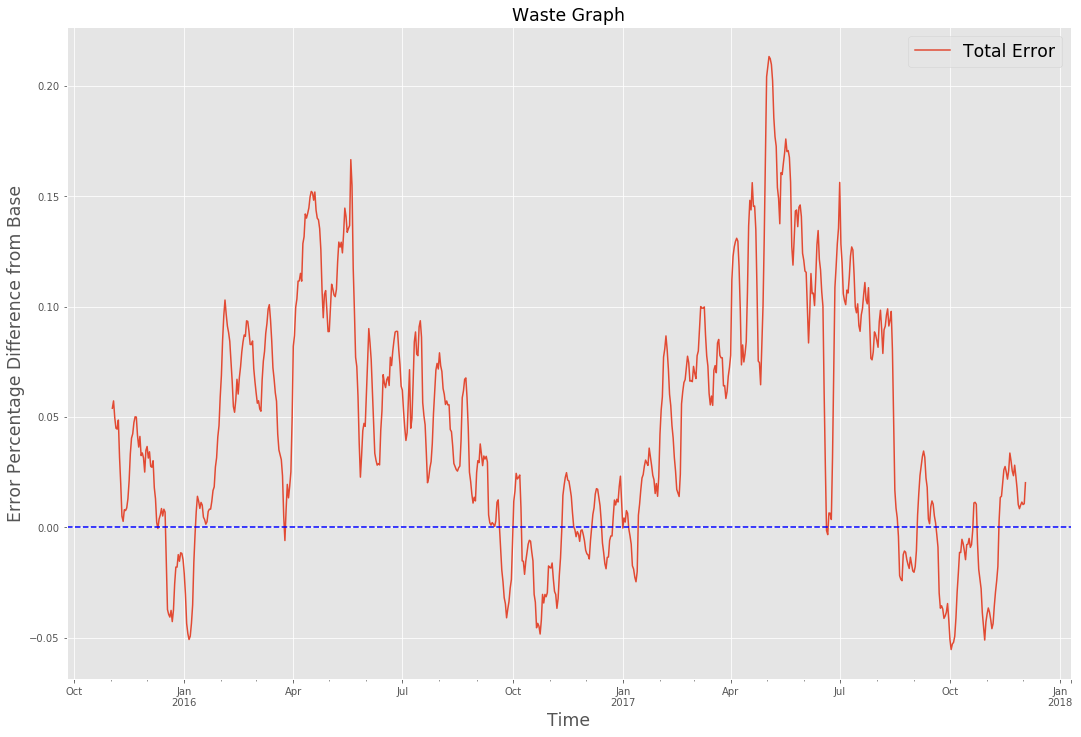

In [69]:
# This plot simply gives an idea about how much waste occurs in our restaurant.
dict_total
total_cd = pd.DataFrame.from_dict(dict_total, orient = "index", columns = ["Total Error"])
total_cd.rolling(window = 50).mean().plot.line(figsize = (18,12))
plt.axhline(y = 0,color = "b", linestyle = "dashed")
plt.xlabel("Time", fontsize = "xx-large")
plt.ylabel("Error Percentage Difference from Base", fontsize ="xx-large")
plt.title("Waste Graph", fontsize = "xx-large")
plt.legend(fontsize = "xx-large")
# plt.savefig("Waste_Graph.PNG")

In [70]:
cd.head()

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,-36.50,20.60,-139.45,-22.30,79.25,296.90,292.75,113.75,16.75,75.45,...,10.8,-53.30,-20.05,97.90,43.95,-113.55,-120.45,255.40,12.60,58.90
1,372.50,115.75,-76.45,39.75,72.50,185.55,-4.00,-227.50,4.00,4.00,...,47.3,-214.75,460.60,26.75,73.95,-41.85,-9.05,-23.55,137.90,-247.55
2,-21.25,-74.00,-52.75,-153.20,183.40,206.50,205.70,-88.75,-14.25,-132.75,...,72.3,168.55,0.00,0.00,43.00,0.00,0.00,26.40,-157.30,80.00
3,-63.50,91.40,-47.50,11.85,-112.10,34.85,-72.50,88.25,-127.90,-71.00,...,-1.1,-51.75,82.25,0.00,0.00,0.00,0.00,-50.55,106.30,-82.25
4,0.00,0.00,0.00,0.00,0.00,0.00,27.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,16.50,-45.50,0.00,16.50,28.85,0.00


Text(0.5,1,'Total Error vs Number of Days')

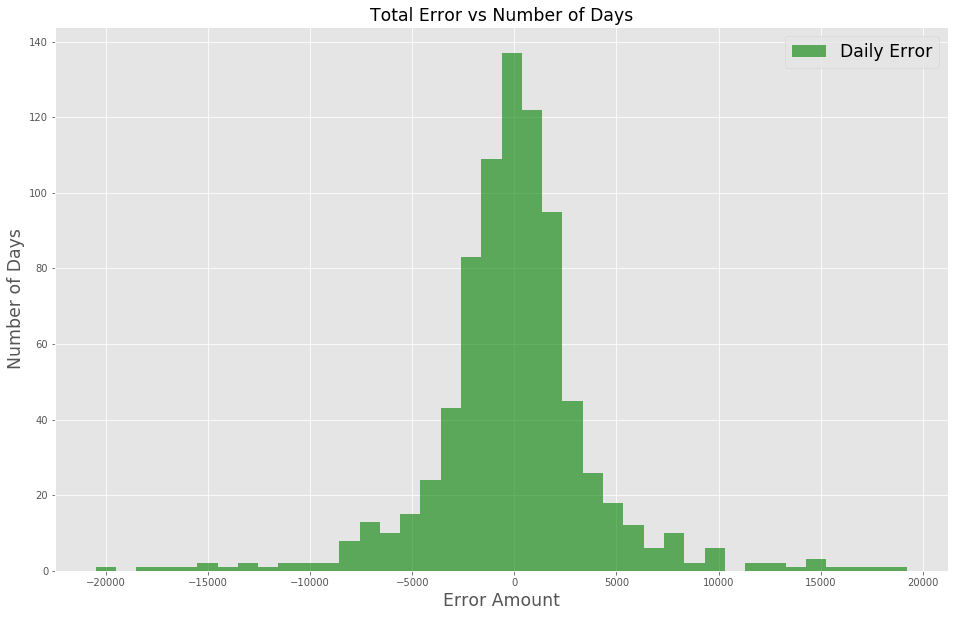

In [71]:
#Lets visualize how much total error happens daily. This is different than abs error since + and - neutralizes each other.
gunluk = {}
for i in range(cd.shape[1]):
    gunluk.update( { cd.columns[i] : cd.iloc[:,i].sum() })
gunluk_df = pd.DataFrame.from_dict(gunluk, orient = "index", columns = ["Daily Error"])
gunluk_df.plot.hist(bins = 40, figsize = (16,10), color = "g", alpha = 0.6)
plt.legend(fontsize = "xx-large")
plt.xlabel("Error Amount", fontsize = "xx-large")
plt.ylabel("Number of Days", fontsize = "xx-large")
plt.title("Total Error vs Number of Days", fontsize = "xx-large")
# plt.savefig("Total_Error_Graph_Cadde.PNG")

In [72]:
# Lets store total absolute error.
abs_error_total = {}
for i in range(abs_diff_cadde.shape[1]):
    total_abs_error = abs_diff_cadde.iloc[:,i].sum() 
    abs_error_total.update( { abs_diff_cadde.columns[i] : total_abs_error })

In [73]:
len(abs_error_total)

812

In [74]:
abs_error = pd.DataFrame.from_dict(abs_error_total, orient = "index", columns = ["abs_error"])

In [75]:
abs_e = abs_error.describe()
abs_e

,abs_error
count,812.000000
mean,4861.904606
std,2506.413375
min,1904.950000
25%,3384.785000
50%,4180.950000
75%,5406.385000
max,20740.800000


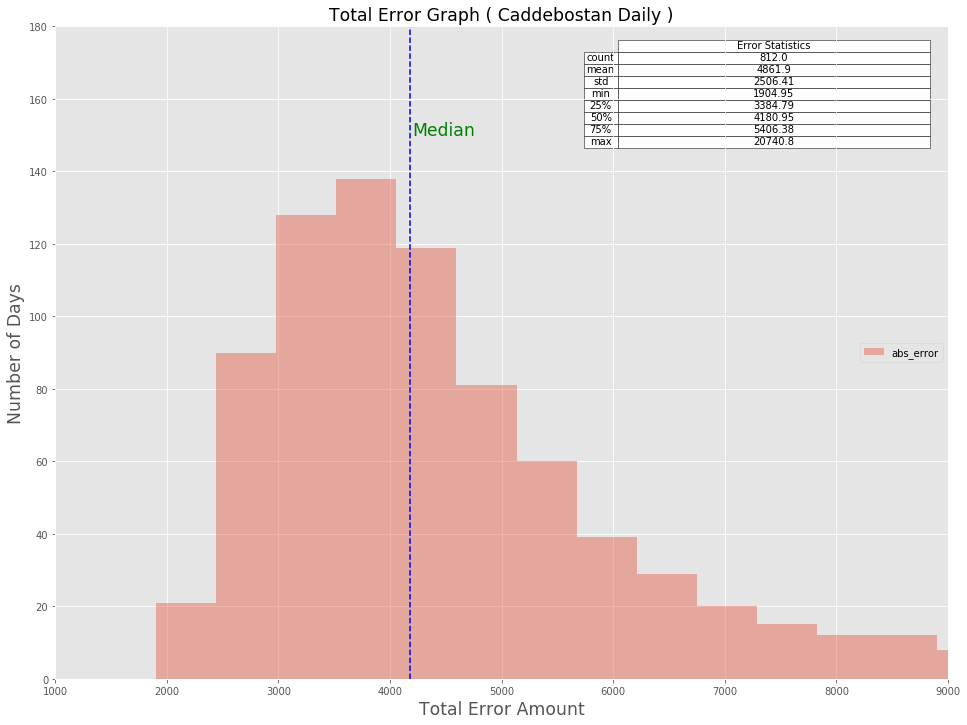

In [76]:
# Lets visualize it to gather relevant insights 
_ = abs_error.plot.hist(alpha = 0.4, figsize = (16,12), bins = 35)
_ = plt.xlim(1000, 9000)
_ = plt.ylim(0,180)
_ = plt.xlabel("Total Error Amount", fontsize = "xx-large")
_ = plt.ylabel("Number of Days", fontsize = "xx-large")
_ = plt.title("Total Error Graph ( Caddebostan Daily )", fontsize = "xx-large")
_ = plt.axvline(4180, color = "b", linestyle = "dashed")
_ = plt.annotate("Median", xy= (4200, 150), fontsize = "xx-large", color = "g")
_ = plt.legend( loc = "center right")
_ = plt.table(cellText = np.round(abs_e.values,2),rowLabels= abs_e.index,colWidths = [0.35]*len(abs_e.columns),
          colLabels= ["Error Statistics"],
          cellLoc = 'center', rowLoc = 'center',
          loc='upper right')
# plt.savefig("Total_Error_Graph_Caddebostan.PNG")

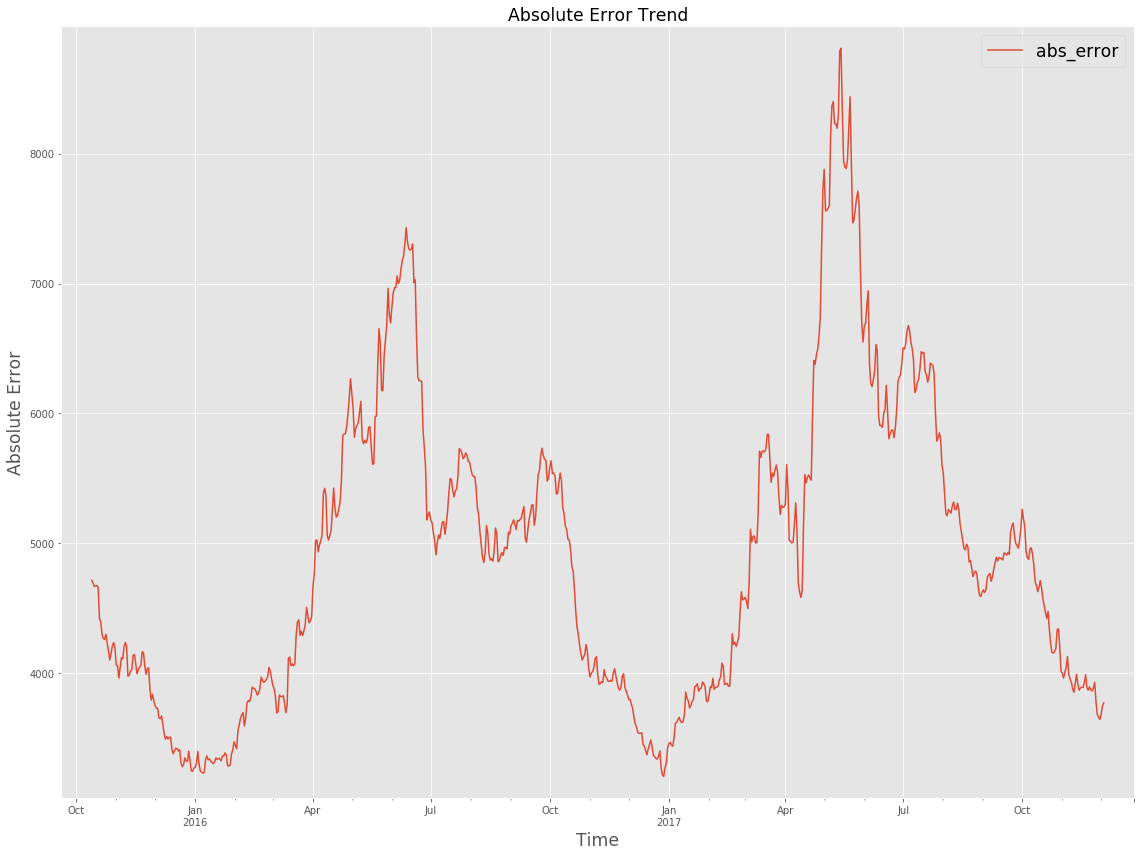

In [77]:
# Lets plot absolute total error graph as a time-series data. I used 30-days moving average for plotting purposes. 
abs_error.rolling(window = 30).mean().plot.line(figsize = (16,12))
plt.xlabel("Time", fontsize = "xx-large")
plt.ylabel("Absolute Error", fontsize = "xx-large")
plt.title("Absolute Error Trend", fontsize = "xx-large")
plt.legend(fontsize = "xx-large")
plt.tight_layout()
plt.margins(0.03)
# plt.savefig("Absolute_Error_Trend.PNG")

### LETS ANALYZE ANOTHER LOCATION : 

In [78]:
muhurdar = processed_data["muhurdar.csv"]

In [79]:
EDA(muhurdar)

(642072, 12)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 642072 entries, 2015-09-07 10:13:00 to 2017-12-03 23:02:00
Data columns (total 12 columns):
FKItemId          642072 non-null int64
DateOfBusiness    642072 non-null object
FKOrderModeId     642072 non-null int64
BurgerMenu        642072 non-null object
Quantity          642072 non-null int64
FKStoreId         642072 non-null int64
Date              642072 non-null datetime64[ns]
Total             642072 non-null float64
UnitPrice         642072 non-null float64
hour              642072 non-null object
minute            642072 non-null int32
half_hour         642072 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 78.8+ MB
None
            FKItemId  FKOrderModeId       Quantity  FKStoreId          Total  \
count  642072.000000  642072.000000  642072.000000   642072.0  642072.000000   
mean    66150.458701       3.271924       1.176555      785.0      16.139166   
std     4

In [80]:
muhurdar.tail(2)

,FKItemId,DateOfBusiness,FKOrderModeId,BurgerMenu,Quantity,FKStoreId,Date,Total,UnitPrice,hour,minute,half_hour
Date_Index,,,,,,,,,,,,
2017-12-03 23:00:00,99923,2017-12-03 00:00:00.000,4,KING CHK MN + KOFTEBRG MN,2,785,2017-12-03,33.0,16.5,23,0,0
2017-12-03 23:02:00,99116,2017-12-03 00:00:00.000,4,KING CHK MN+KING BOY TB.M,1,785,2017-12-03,16.5,16.5,23,2,0


In [81]:
muhurdar.head(2)

,FKItemId,DateOfBusiness,FKOrderModeId,BurgerMenu,Quantity,FKStoreId,Date,Total,UnitPrice,hour,minute,half_hour
Date_Index,,,,,,,,,,,,
2015-09-07 10:13:00,99112,2015-09-07 00:00:00.000,4,2 ADET KING CHICKEN MENU,1,785,2015-09-07,13.50,13.50,10,13,0
2015-09-07 10:42:00,99107,2015-09-07 00:00:00.000,1,EKIM KING CHICKEN MENU,1,785,2015-09-07,7.75,7.75,10,42,1


In [82]:
seri2 = muhurdar.groupby(["Date", "hour", "half_hour"])["Total"].sum()

In [83]:
dict_daily2 = {}
for i in range(len(seri2.index.levels[0])):
    dict_daily2.update({ seri2.index.levels[0][i] : seri2[seri2.index.levels[0][i]]} ) 

In [84]:
muhurdar2 = pd.DataFrame.from_dict(dict_daily2)

In [85]:
muhurdar_daily_sales = muhurdar2.fillna(0).reset_index()

In [86]:
muhurdar_daily_sales.head()

,hour,half_hour,2015-09-07 00:00:00,2015-09-08 00:00:00,2015-09-09 00:00:00,2015-09-10 00:00:00,2015-09-11 00:00:00,2015-09-12 00:00:00,2015-09-13 00:00:00,2015-09-14 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,0,0,0.00,0.00,0.00,0.00,15.25,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,95.5,13.00,0.00
1,10,0,13.50,0.00,0.00,42.50,13.50,0.0,27.00,18.25,...,49.95,49.50,64.90,0.00,50.95,50.9,27.45,25.9,61.45,30.00
2,10,1,34.75,56.25,24.00,42.50,0.00,0.0,18.00,96.20,...,64.85,75.40,141.90,42.95,27.45,66.7,38.00,87.4,152.00,42.40
3,11,0,91.60,97.25,20.25,27.00,57.50,13.5,13.50,159.25,...,131.70,126.30,75.40,53.25,102.40,0.0,126.45,138.4,157.05,133.90
4,11,1,116.70,402.25,91.50,228.75,189.00,166.5,53.25,267.00,...,52.95,201.95,94.45,45.95,67.45,53.9,90.90,55.9,265.10,216.05


In [87]:
diff_muhurdar = {}
for i in range(muhurdar_daily_sales.shape[1] - 9 ):
    fark = muhurdar_daily_sales.iloc[:,i+9] - muhurdar_daily_sales.iloc[:,i+2]
    diff_muhurdar.update( { muhurdar_daily_sales.columns[i+9] : fark })

In [88]:
muhurdar_diff = pd.DataFrame.from_dict(diff_muhurdar)

In [89]:
muhurdar_diff.head()

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,0.00,0.00,0.00,0.00,2.95,21.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.50,13.00,0.0
1,4.75,36.50,0.00,8.00,13.50,27.00,-13.50,-3.25,-36.50,46.00,...,49.95,-75.00,-19.55,-33.00,50.95,2.40,-11.75,-24.05,11.95,-34.9
2,61.45,2.00,42.00,-10.25,39.75,64.75,-0.25,-31.95,-58.25,-66.00,...,48.35,37.75,72.95,32.00,27.45,66.70,16.50,22.55,76.60,-99.5
3,67.65,-54.00,89.75,61.25,-30.50,26.25,13.50,-113.75,-11.25,-49.50,...,98.70,73.35,75.40,36.75,68.95,-108.80,104.95,6.70,30.75,58.5
4,150.30,-206.25,60.00,-54.25,-7.30,2.65,-30.00,-61.75,-24.00,-5.75,...,-94.40,185.45,15.85,-61.00,10.50,-59.35,30.50,2.95,63.15,121.6


In [90]:
muhurdar_abs = muhurdar_diff.abs()

In [91]:
ratio = {} 
for i in range(muhurdar_abs.shape[1]):
    oran = muhurdar_abs.iloc[:,i].sum() / muhurdar_daily_sales.iloc[:,i+2].sum()
    ratio.update( { muhurdar_abs.columns[i] : oran })

In [93]:
abs_error_diff_muhurdar = pd.DataFrame.from_dict(ratio, orient = "index", columns = ["abs_error_pct"])

In [94]:
stats = abs_error_diff_muhurdar.describe()

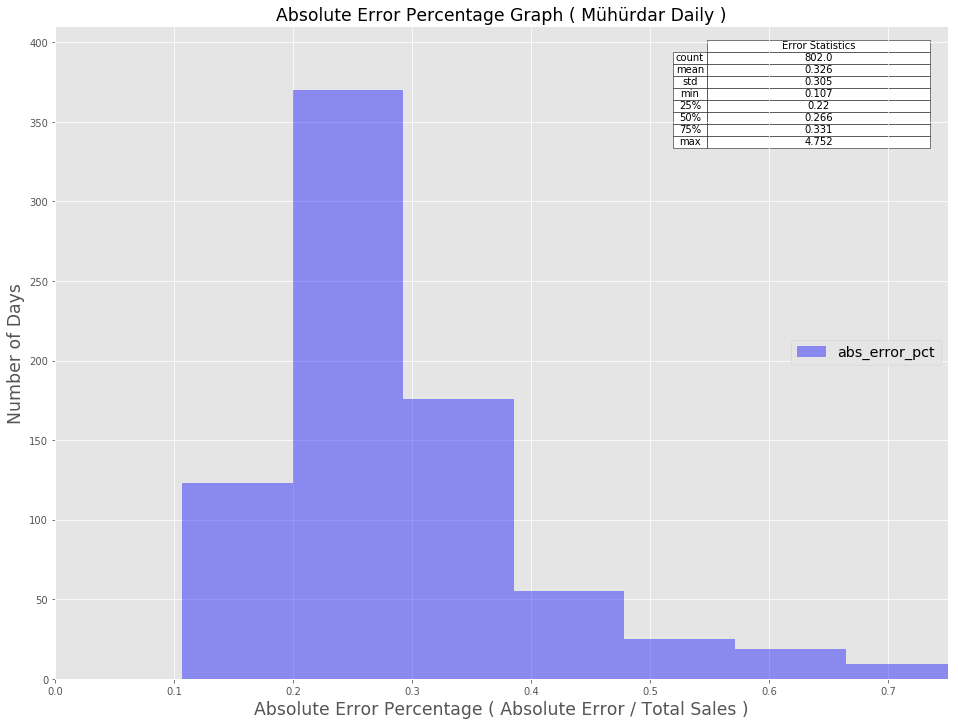

In [95]:
_ = abs_error_diff_muhurdar.plot.hist(color = "blue", bins = 50, figsize = (16,12), alpha = 0.4)
_ = plt.xlim(0, 0.75)
_ = plt.ylim(0, 410)
_ = plt.xlabel("Absolute Error Percentage ( Absolute Error / Total Sales )", fontsize = "xx-large")
_ = plt.title("Absolute Error Percentage Graph ( Mühürdar Daily )", fontsize = "xx-large")
_ = plt.ylabel("Number of Days", fontsize = "xx-large")
_ = plt.table(cellText = np.round(stats.values,3),rowLabels= stats.index,colWidths = [0.25]*len(stats.columns),
          colLabels= ["Error Statistics"],
          cellLoc = 'center', rowLoc = 'center',
          loc='upper right')
_ = plt.legend(loc = "center right", fontsize = "x-large")
plt.savefig("Abs_Error_PCT_Mühürdar.PNG")
plt.show()

In [96]:
muhurdar_stats = muhurdar_abs.describe()

In [97]:
muhurdar_abs
abs_error_muhurdar = {}
for i in range(muhurdar_abs.shape[1]):
    abs_error_muhurdar.update( { muhurdar_abs.columns[i] : muhurdar_abs.iloc[:,i].sum() })

In [98]:
muhurdar_abs_error = pd.DataFrame.from_dict(abs_error_muhurdar, orient = "index", columns = ["abs_error"])

In [99]:
muhurdar_stats = muhurdar_abs_error.describe()

In [100]:
muhurdar_stats

,abs_error
count,802.000000
mean,3828.358990
std,2091.886741
min,1581.070000
25%,2758.352500
50%,3272.265000
75%,4198.582500
max,27492.950000


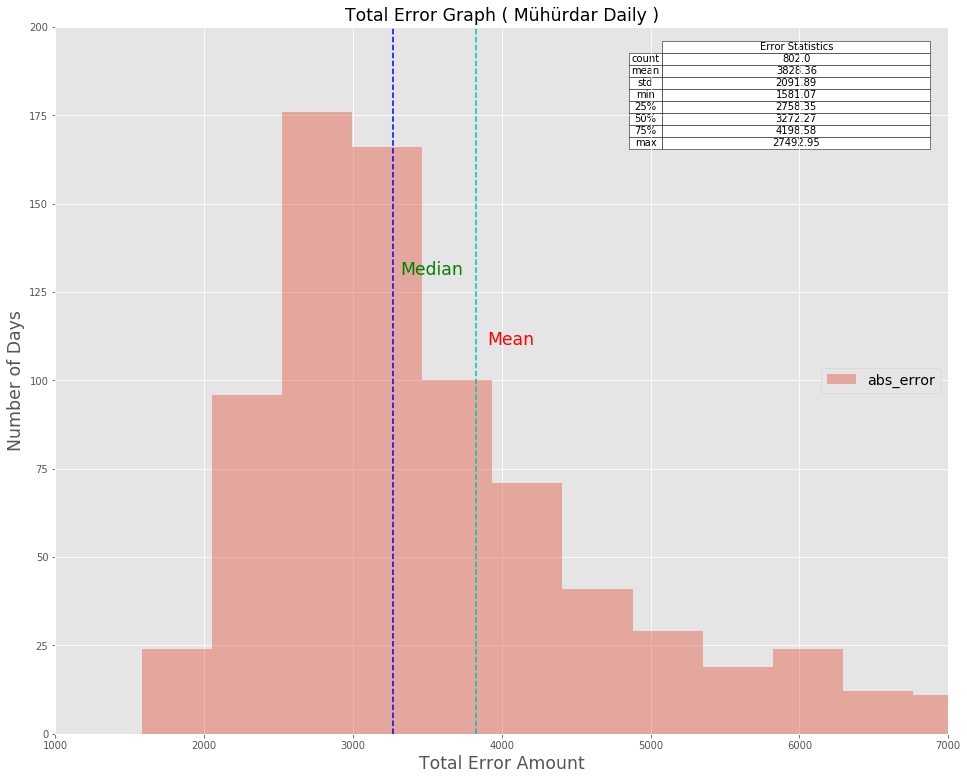

In [101]:
_ = muhurdar_abs_error.plot.hist(alpha = 0.4, figsize = (16,13), bins = 55)
_ = plt.xlim(1000, 7000)
_ = plt.ylim(0,200)
_ = plt.xlabel("Total Error Amount", fontsize = "xx-large")
_ = plt.ylabel("Number of Days", fontsize = "xx-large")
_ = plt.title("Total Error Graph ( Mühürdar Daily )", fontsize = "xx-large")
_ = plt.axvline(3272, color = "b", linestyle = "dashed")
_ = plt.axvline(3828, color = "c", linestyle = "dashed")
_ = plt.annotate("Median", xy= (3320, 130), fontsize = "xx-large", color = "g")
_ = plt.annotate("Mean", xy= (3900, 110), fontsize = "xx-large", color = "r")
_ = plt.legend( loc = "center right", fontsize = "x-large")
_ = plt.table(cellText = np.round(muhurdar_stats.values,2),rowLabels= muhurdar_stats.index,colWidths = [0.30]*len(muhurdar_stats.columns),
          colLabels= ["Error Statistics"],
          cellLoc = 'center', rowLoc = 'center',
          loc='upper right')
# plt.savefig("Total_Error_Graph_Muhurdar1.PNG")

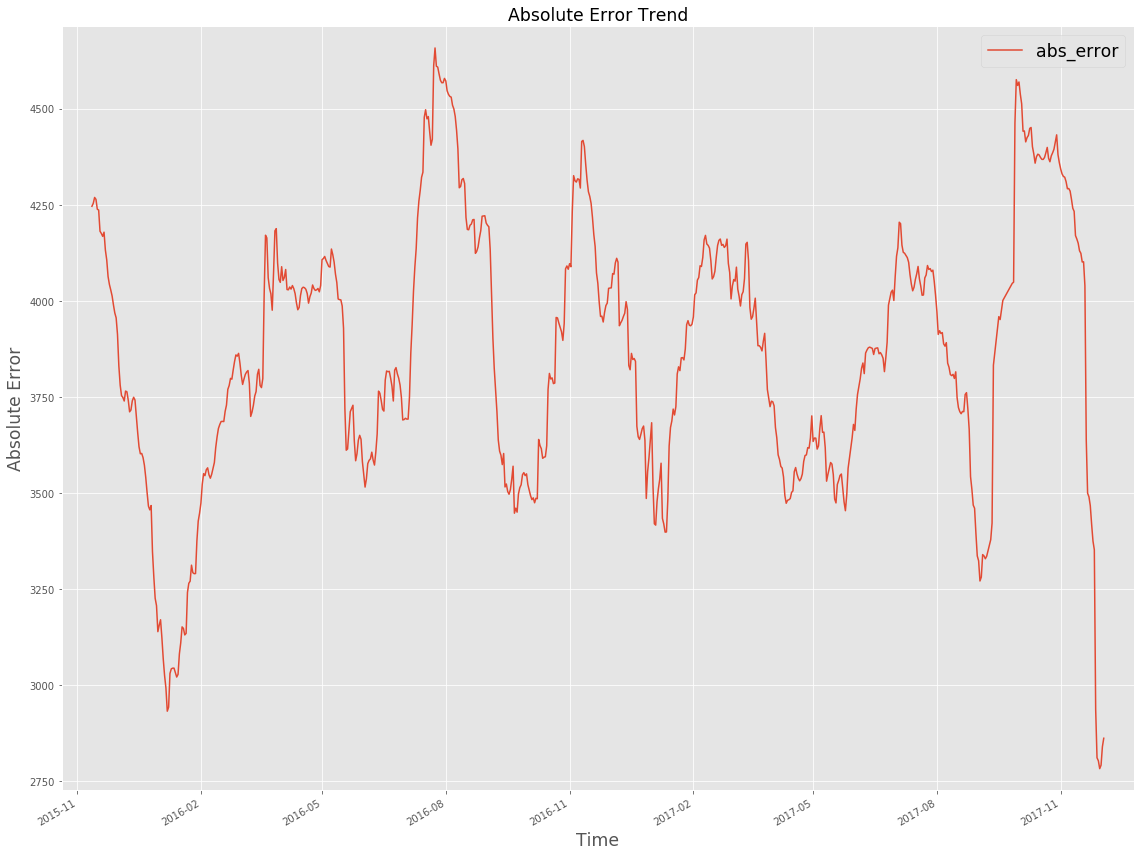

In [102]:
muhurdar_abs_error.rolling(window = 60).mean().plot.line(figsize = (16,12))
plt.xlabel("Time", fontsize = "xx-large")
plt.ylabel("Absolute Error", fontsize = "xx-large")
plt.title("Absolute Error Trend", fontsize = "xx-large")
plt.legend(fontsize = "xx-large")
plt.tight_layout()
plt.margins(0.03)
# plt.savefig("Absolute_Error_Trend_Bahariye.PNG")

In [103]:
muhurdar_diff.head(2)

,2015-09-14 00:00:00,2015-09-15 00:00:00,2015-09-16 00:00:00,2015-09-17 00:00:00,2015-09-18 00:00:00,2015-09-19 00:00:00,2015-09-20 00:00:00,2015-09-21 00:00:00,2015-09-22 00:00:00,2015-09-23 00:00:00,...,2017-11-24 00:00:00,2017-11-25 00:00:00,2017-11-26 00:00:00,2017-11-27 00:00:00,2017-11-28 00:00:00,2017-11-29 00:00:00,2017-11-30 00:00:00,2017-12-01 00:00:00,2017-12-02 00:00:00,2017-12-03 00:00:00
0,0.00,0.0,0.0,0.0,2.95,21.75,0.0,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,95.50,13.00,0.0
1,4.75,36.5,0.0,8.0,13.50,27.00,-13.5,-3.25,-36.5,46.0,...,49.95,-75.0,-19.55,-33.0,50.95,2.4,-11.75,-24.05,11.95,-34.9


In [104]:
cd2 = muhurdar_diff.copy()

In [105]:
dict_total2 = {}
for i in range(cd2.shape[1]):
    dict_total2.update( { cd2.columns[i]: ( cd2[cd2.columns[i]].sum() / muhurdar_daily_sales.iloc[:, i+2].sum() ) })

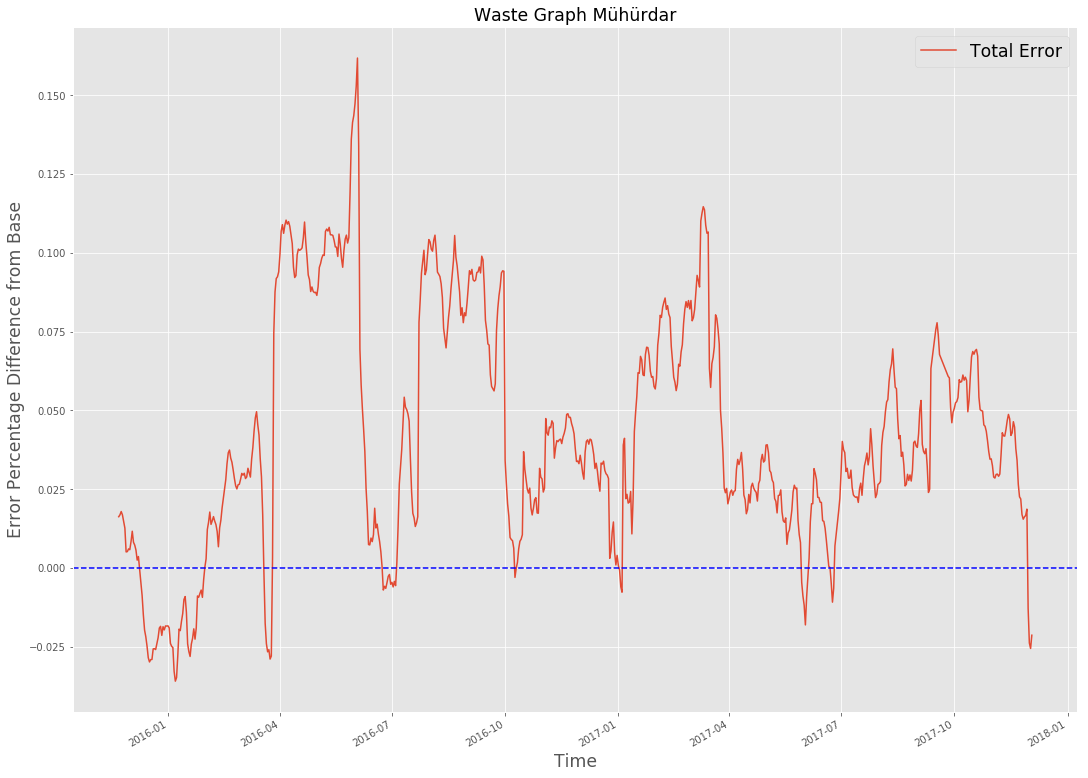

In [106]:
dict_total2
total_cd2 = pd.DataFrame.from_dict(dict_total2, orient = "index", columns = ["Total Error"])
total_cd2.rolling(window = 70).mean().plot.line(figsize = (18,14))
plt.axhline(y = 0,color = "b", linestyle = "dashed")
plt.xlabel("Time", fontsize = "xx-large")
plt.ylabel("Error Percentage Difference from Base", fontsize ="xx-large")
plt.title("Waste Graph Mühürdar", fontsize = "xx-large")
plt.legend(fontsize = "xx-large")
plt.savefig("Waste_Graph_Mühürdar.PNG")

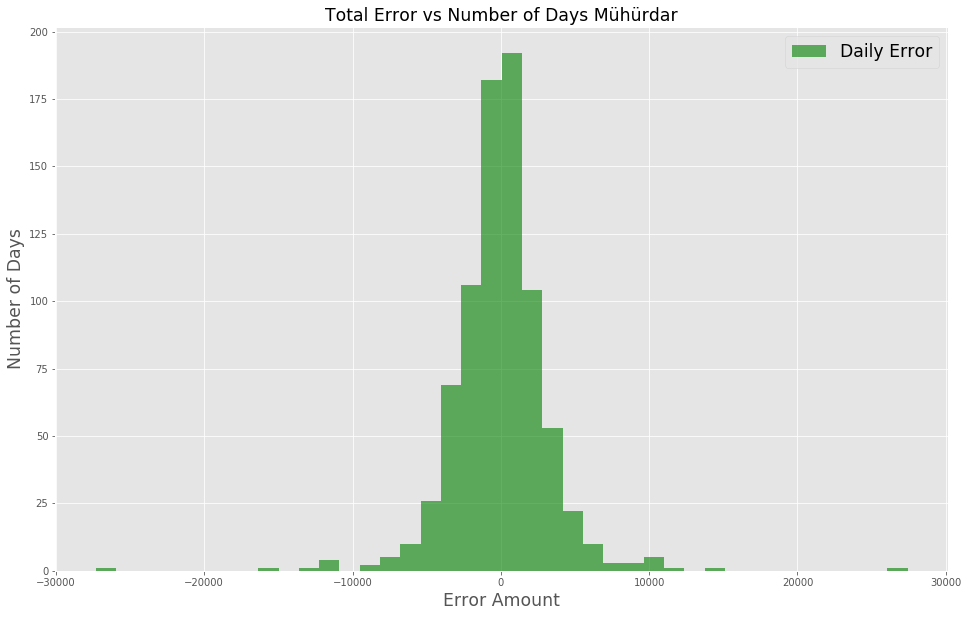

In [107]:
gunluk2 = {}
for i in range(cd2.shape[1]):
    gunluk2.update( { cd2.columns[i] : cd2.iloc[:,i].sum() })
gunluk_df2 = pd.DataFrame.from_dict(gunluk2, orient = "index", columns = ["Daily Error"])
gunluk_df2.plot.hist(bins = 40, figsize = (16,10), color = "g", alpha = 0.6)
plt.legend(fontsize = "xx-large")
plt.xlabel("Error Amount", fontsize = "xx-large")
plt.ylabel("Number of Days", fontsize = "xx-large")
plt.title("Total Error vs Number of Days Mühürdar", fontsize = "xx-large")
plt.savefig("Total_Error_Graph_Mühürdar2.PNG")

In [108]:
## THIS PART IS FOR SEPERATING DATA WEEKLY.

W1 =  muhurdar["2015-09-07":"2015-09-13"]
W2 =  muhurdar["2015-09-14":"2015-09-20"]
W3 =  muhurdar["2015-09-21":"2015-09-27"]
W4 =  muhurdar["2015-09-28":"2015-10-04"]
W5 =  muhurdar["2015-10-05":"2015-10-11"]
W6 =  muhurdar["2015-10-12":"2015-10-18"]
W7 =  muhurdar["2015-10-19":"2015-10-25"]
W8 =  muhurdar["2015-10-26":"2015-11-01"]
W9 =  muhurdar["2015-11-02":"2015-11-08"]
W10 =  muhurdar["2015-11-09":"2015-11-15"]
W11 =  muhurdar["2015-11-16":"2015-11-22"]
W12 =  muhurdar["2015-11-23":"2015-11-29"]
W13 =  muhurdar["2015-11-30":"2015-12-06"]
W14 =  muhurdar["2015-12-07":"2015-12-13"]
W15 =  muhurdar["2015-12-14":"2015-12-20"]
W16 =  muhurdar["2015-12-21":"2015-12-27"]
W17 =  muhurdar["2015-12-28":"2016-01-03"]
W18 =  muhurdar["2016-01-04":"2016-01-10"]
W19 =  muhurdar["2016-01-11":"2016-01-17"]
W20 =  muhurdar["2016-01-18":"2016-01-24"]
W21 =  muhurdar["2016-01-25":"2016-01-31"]
W22 =  muhurdar["2016-02-01":"2016-02-07"]
W23 =  muhurdar["2016-02-08":"2016-02-14"]
W24 =  muhurdar["2016-02-15":"2016-02-21"]
W25 =  muhurdar["2016-02-22":"2016-02-28"]
W26 =  muhurdar["2016-02-29":"2016-03-06"]
W27 =  muhurdar["2016-03-07":"2016-03-13"]
W28 =  muhurdar["2016-03-14":"2016-03-20"]
W29 =  muhurdar["2016-03-21":"2016-03-27"]
W30 =  muhurdar["2016-03-28":"2016-04-03"]
W31 =  muhurdar["2016-04-04":"2016-04-10"]
W32 =  muhurdar["2016-04-11":"2016-04-17"]
W33 =  muhurdar["2016-04-18":"2016-04-24"]
W34 =  muhurdar["2016-04-25":"2016-05-01"]
W35 =  muhurdar["2016-05-02":"2016-05-08"]
W36 =  muhurdar["2016-05-09":"2016-05-15"]
W37 =  muhurdar["2016-05-16":"2016-05-22"]
W38 =  muhurdar["2016-05-23":"2016-05-29"]
W39 =  muhurdar["2016-05-30":"2016-06-05"]
W40 =  muhurdar["2016-06-06":"2016-06-12"]
W41 =  muhurdar["2016-06-13":"2016-06-19"]
W42 =  muhurdar["2016-06-20":"2016-06-26"]
W43 =  muhurdar["2016-06-27":"2016-07-03"]
W44 =  muhurdar["2016-07-04":"2016-07-10"]
W45 =  muhurdar["2016-07-11":"2016-07-17"]
W46 =  muhurdar["2016-07-18":"2016-07-24"]
W47 =  muhurdar["2016-07-25":"2016-07-31"]
W48 =  muhurdar["2016-08-01":"2016-08-07"]
W49 =  muhurdar["2016-08-08":"2016-08-14"]
W50 =  muhurdar["2016-08-15":"2016-08-21"]
W51 =  muhurdar["2016-08-22":"2016-08-28"]
W52 =  muhurdar["2016-08-29":"2016-09-04"]
W53 =  muhurdar["2016-09-05":"2016-09-11"]
W54 =  muhurdar["2016-09-12":"2016-09-18"]
W55 =  muhurdar["2016-09-19":"2016-09-25"]
W56 =  muhurdar["2016-09-26":"2016-10-02"]
W57 =  muhurdar["2016-10-03":"2016-10-09"]
W58 =  muhurdar["2016-10-10":"2016-10-16"]
W59 =  muhurdar["2016-10-17":"2016-10-23"]
W60 =  muhurdar["2016-10-24":"2016-10-30"]
W61 =  muhurdar["2016-10-31":"2016-11-06"]
W62 =  muhurdar["2016-11-07":"2016-11-13"]
W63 =  muhurdar["2016-11-14":"2016-11-20"]
W64 =  muhurdar["2016-11-21":"2016-11-27"]
W65 =  muhurdar["2016-11-28":"2016-12-04"]
W66 =  muhurdar["2016-12-05":"2016-12-11"]
W67 =  muhurdar["2016-12-12":"2016-12-18"]
W68 =  muhurdar["2016-12-19":"2016-12-25"]
W69 =  muhurdar["2016-12-26":"2017-01-01"]
W70 =  muhurdar["2017-01-02":"2017-01-08"]
W71 =  muhurdar["2017-01-09":"2017-01-15"]
W72 =  muhurdar["2017-01-16":"2017-01-22"]
W73 =  muhurdar["2017-01-23":"2017-01-29"]
W74 =  muhurdar["2017-01-30":"2017-02-05"]
W75 =  muhurdar["2017-02-06":"2017-02-12"]
W76 =  muhurdar["2017-02-13":"2017-02-19"]
W77 =  muhurdar["2017-02-20":"2017-02-26"]
W78 =  muhurdar["2017-02-27":"2017-03-05"]
W79 =  muhurdar["2017-03-06":"2017-03-12"]
W80 =  muhurdar["2017-03-13":"2017-03-19"]
W81 =  muhurdar["2017-03-20":"2017-03-26"]
W82 =  muhurdar["2017-03-27":"2017-04-02"]
W83 =  muhurdar["2017-04-03":"2017-04-09"]
W84 =  muhurdar["2017-04-10":"2017-04-16"]
W85 =  muhurdar["2017-04-17":"2017-04-23"]
W86 =  muhurdar["2017-04-24":"2017-04-30"]
W87 =  muhurdar["2017-05-01":"2017-05-07"]
W88 =  muhurdar["2017-05-08":"2017-05-14"]
W89 =  muhurdar["2017-05-15":"2017-05-21"]
W90 =  muhurdar["2017-05-22":"2017-05-28"]
W91 =  muhurdar["2017-05-29":"2017-06-04"]
W92 =  muhurdar["2017-06-05":"2017-06-11"]
W93 =  muhurdar["2017-06-12":"2017-06-18"]
W94 =  muhurdar["2017-06-19":"2017-06-25"]
W95 =  muhurdar["2017-06-26":"2017-07-02"]
W96 =  muhurdar["2017-07-03":"2017-07-09"]
W97 =  muhurdar["2017-07-10":"2017-07-16"]
W98 =  muhurdar["2017-07-17":"2017-07-23"]
W99 =  muhurdar["2017-07-24":"2017-07-30"]
W100 =  muhurdar["2017-07-31":"2017-08-06"]
W101 =  muhurdar["2017-08-07":"2017-08-13"]
W102 =  muhurdar["2017-08-14":"2017-08-20"]
W103 =  muhurdar["2017-08-21":"2017-08-27"]
W104 =  muhurdar["2017-08-28":"2017-09-03"]
W105 =  muhurdar["2017-09-04":"2017-09-10"]
W106 =  muhurdar["2017-09-11":"2017-09-17"]
W107 =  muhurdar["2017-09-18":"2017-09-24"]
W108 =  muhurdar["2017-09-25":"2017-10-01"]
W109 =  muhurdar["2017-10-02":"2017-10-08"]
W110 =  muhurdar["2017-10-09":"2017-10-15"]
W111 =  muhurdar["2017-10-16":"2017-10-22"]
W112 =  muhurdar["2017-10-23":"2017-10-29"]
W113 =  muhurdar["2017-10-30":"2017-11-05"]
W114 =  muhurdar["2017-11-06":"2017-11-12"]
W115 =  muhurdar["2017-11-13":"2017-11-19"]
W116 =  muhurdar["2017-11-20":"2017-11-26"]
W117 =  muhurdar["2017-11-27":"2017-12-03"]

In [109]:
#A LIST CONTAINS WEEKLY STORE DATA
list_weeks = [W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,
         W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,
         W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,
         W91,W92,W93,W94,W95,W96,W97,W98,W99,W100,W101,W102,W103,W104,W105,W106,W107,W108,W109,
         W110,W111,W112,W113,W114,W115,W116,W117]

In [110]:
len(list_weeks)

117

In [111]:
def haftalık_base_calculator(haftalık_data):
    """ It accepts arguments as a list of dataframes and returns single value for each of the dataframe that is in the list.
    If you want to calculate base for a single week : please provide it in the list format and then slice it 
    an example is : haftalık_base_calculator(list4[0:1]) , not haftalık_base_calculator(list4[0])  """
    #weekly_base = []
    dict_weekly = {}
    dict_weekly2 = {}
    for i in range(len(haftalık_data)):
        series = haftalık_data[i].groupby(["Date", "hour", "half_hour"])["Total"].sum()
        sevendays = []
        for k in range(len(series.index.levels[0])):
            array = series[series.index.levels[0][k]].values
            max_number = 0
            for j in range(len(array)-1):
                frkn = array[j] + array[j+1]
                if frkn > max_number:
                    max_number = frkn
                else:
                    max_number = max_number
            sevendays.append( max_number / 6 ) # 6 is the number of levels. For level1 value we divide it by 6. ( problem specific )
        array7 = np.array(sevendays)
        daily_base = np.mean(array7)
        # weekly_base.append(np.min(array7[array7 > daily_base]))
        a = np.min(array7[array7 > daily_base])
        index = array7.tolist().index(a)
        array2 = series[series.index.levels[0][index]]
        dict_weekly.update({a:array2})
        dict_weekly2.update({series.index.levels[0][index]:array2})
         
    return dict_weekly, dict_weekly2

In [112]:
dict_weekly, dict_weekly2 = haftalık_base_calculator(list_weeks)

In [113]:
len(dict_weekly2)

117

In [114]:
len(dict_weekly)

117

In [115]:
### dict_weekly2 yi dataframe e çevirmeliyiz, sonrasında ise her 1 sonraki hafta için belirlenmiş olan baz günü o haftanın 
# yarımşar saatlik satış datasından çıkarmamız gerekiyor. Bu sayede bazdan farkını elde etmiş oluruz, bu elde ettiğimiz dataframe
# daha düzgün incelenerek ( abs vs ) total error hesaplanır, sonra bu total error baz değerine bölünerek gün gün bazdan sapmalar 
#hesaplanabilir !!

In [116]:
weekly_base_muhurdar = pd.DataFrame.from_dict(dict_weekly2, orient = "index")

In [117]:
muhurdar_base_weekly = weekly_base_muhurdar.transpose().fillna(0).reset_index()

In [118]:
muhurdar_base_weekly.head()

,level_0,level_1,2015-09-08 00:00:00,2015-09-19 00:00:00,2015-09-27 00:00:00,2015-10-02 00:00:00,2015-10-11 00:00:00,2015-10-18 00:00:00,2015-10-20 00:00:00,2015-10-29 00:00:00,...,2017-09-29 00:00:00,2017-10-06 00:00:00,2017-10-13 00:00:00,2017-10-22 00:00:00,2017-10-27 00:00:00,2017-11-03 00:00:00,2017-11-12 00:00:00,2017-11-19 00:00:00,2017-11-24 00:00:00,2017-12-01 00:00:00
0,10,1,56.25,64.75,98.75,20.25,34.75,57.00,135.50,0.0,...,57.45,0.0,55.95,86.75,21.90,98.85,65.30,68.95,64.85,87.4
1,11,0,97.25,39.75,104.25,247.75,68.25,86.00,139.00,95.0,...,108.85,70.8,72.65,142.30,98.70,71.65,62.95,0.00,131.70,138.4
2,11,1,402.25,169.15,88.50,319.75,93.50,131.75,69.00,72.2,...,131.90,177.4,145.10,119.90,122.35,155.60,64.10,78.60,52.95,55.9
3,12,0,396.87,347.70,65.00,277.00,432.50,140.75,363.50,359.2,...,173.85,217.4,226.35,184.65,120.65,253.15,285.25,186.40,308.65,243.3
4,12,1,658.45,289.40,216.70,447.50,399.25,346.70,807.25,426.0,...,541.70,557.6,385.75,446.60,474.80,480.40,181.05,296.65,448.25,438.1


In [119]:
base = muhurdar_base_weekly.copy()

In [120]:
muhurdar_base_weekly.to_csv("muhurdar_weekly_base.csv")

In [121]:
seri5 = W2.groupby(["Date", "hour", "half_hour"])["Total"].sum()

In [122]:
seri5.index.levels[0]

DatetimeIndex(['2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [123]:
seri5[seri5.index.levels[0][0]].reset_index()

,hour,half_hour,Total
0,10,0,18.25
1,10,1,96.20
2,11,0,159.25
3,11,1,267.00
4,12,0,383.25
5,12,1,599.75
6,13,0,761.75
7,13,1,611.75
8,14,0,1051.25
9,14,1,782.25


In [124]:
base.head()

,level_0,level_1,2015-09-08 00:00:00,2015-09-19 00:00:00,2015-09-27 00:00:00,2015-10-02 00:00:00,2015-10-11 00:00:00,2015-10-18 00:00:00,2015-10-20 00:00:00,2015-10-29 00:00:00,...,2017-09-29 00:00:00,2017-10-06 00:00:00,2017-10-13 00:00:00,2017-10-22 00:00:00,2017-10-27 00:00:00,2017-11-03 00:00:00,2017-11-12 00:00:00,2017-11-19 00:00:00,2017-11-24 00:00:00,2017-12-01 00:00:00
0,10,1,56.25,64.75,98.75,20.25,34.75,57.00,135.50,0.0,...,57.45,0.0,55.95,86.75,21.90,98.85,65.30,68.95,64.85,87.4
1,11,0,97.25,39.75,104.25,247.75,68.25,86.00,139.00,95.0,...,108.85,70.8,72.65,142.30,98.70,71.65,62.95,0.00,131.70,138.4
2,11,1,402.25,169.15,88.50,319.75,93.50,131.75,69.00,72.2,...,131.90,177.4,145.10,119.90,122.35,155.60,64.10,78.60,52.95,55.9
3,12,0,396.87,347.70,65.00,277.00,432.50,140.75,363.50,359.2,...,173.85,217.4,226.35,184.65,120.65,253.15,285.25,186.40,308.65,243.3
4,12,1,658.45,289.40,216.70,447.50,399.25,346.70,807.25,426.0,...,541.70,557.6,385.75,446.60,474.80,480.40,181.05,296.65,448.25,438.1


In [125]:
week = seri5[seri5.index.levels[0][1]].reset_index()

In [126]:
week

,hour,half_hour,Total
0,10,0,36.50
1,10,1,58.25
2,11,0,43.25
3,11,1,196.00
4,12,0,521.25
5,12,1,524.50
6,13,0,492.25
7,13,1,702.75
8,14,0,631.65
9,14,1,695.05


In [127]:
#### base ve weekleri csv ' e aktar, indexleri arrange et, sonra bazdan çıkar

In [128]:
def haftaiçi_base_calculator(haftaiçi):
    """ It accepts a list containing dataframes as input argument and returns a single value for each of the dataframe that is
    inside the list.If you want to calculate base for a single week : please provide it in the list format and then slice it 
    an example is : haftaiçi_base_calculator(list4[0:1]) , not haftaiçi_base_calculator(list4[0]) """
    haftaiçi_base = [] 
    for i in range(len(haftaiçi)):
        seri5 = haftaiçi[i].groupby(["Date", "hour", "half_hour"])["Total"].sum()
        fivedays = []
        for j in range(len(seri5.index.levels[0])):
            array5 = seri5[seri5.index.levels[0][j]].values
            max_no = 0 
            for k in range(len(array5)-1):
                gnr = array5[k] + array5[k+1]
                if gnr > max_no:
                    max_no = gnr 
                else:
                    max_no = max_no
            fivedays.append( max_no / 6 )
        array_five = np.array(fivedays)
        mean_five = np.mean(array_five)
        haftaiçi_base.append(np.min(array_five[array_five > mean_five]))   
    return haftaiçi_base

In [129]:
def haftasonu_base_calculator(haftasonu):
    """It accepts a list containing dataframes as input argument and returns a single value for each of the dataframe that is
    in the list."""
    haftasonu_base = []
    for i in range(len(haftasonu)):
        serison = haftasonu[i].groupby(["Date", "hour", "half_hour"])["Total"].sum()
        twodays = []
        for j in range(len(serison.index.levels[0])):
            array_son = serison[serison.index.levels[0][j]].values
            max_n = 0 
            for f in range(len(array_son)-1):
                number = array_son[f] + array_son[f+1]
                if number > max_n:
                    max_n = number
                else:
                    max_n = max_n
            twodays.append(max_n / 6)
        arr = np.array(twodays)
        m_arr = np.mean(arr)
        haftasonu_base.append(np.min(arr[arr > m_arr]))
    return haftasonu_base

In [130]:
def daily_base_calculator(dataframe):
    """ This function will take dataframe that is processed for analysis as input argument and return single value which 
    is representing the daily base numbers."""
    daily_base = []
    ss = dataframe.groupby(["Date", "hour", "half_hour"])["Total"].sum()
    for i in range(len(ss.index.levels[0])):
        obje = ss[ss.index.levels[0][i]].values
        max_no = 0 
        for j in range(len(obje)-1):
            frkngnr = obje[j] + obje[j+1]
            if frkngnr > max_no:
                max_no = frkngnr 
            else:
                max_no = max_no
        daily_base.append( max_no / 6 )
    return daily_base

In [131]:
## THIS SEPERATES DATA WEEKLY BY ONLY TAKING WEEKDAYS. 

# YOU CAN CHANGE "DATAFRAME5" WITH THE DATAFRAME YOU WANT TO USE !

W1A=  dataframe5["2015-09-07"  :  "2015-09-11" ]
W2A=  dataframe5["2015-09-14"  :  "2015-09-18" ]
W3A=  dataframe5["2015-09-21"  :  "2015-09-25" ]
W4A=  dataframe5["2015-09-28"  :  "2015-10-02" ]
W5A=  dataframe5["2015-10-05"  :  "2015-10-09" ]
W6A=  dataframe5["2015-10-12"  :  "2015-10-16" ]
W7A=  dataframe5["2015-10-19"  :  "2015-10-23" ]
W8A=  dataframe5["2015-10-26"  :  "2015-10-30" ]
W9A=  dataframe5["2015-11-02"  :  "2015-11-06" ]
W10A=  dataframe5["2015-11-09"  :  "2015-11-13" ]
W11A=  dataframe5["2015-11-16"  :  "2015-11-20" ]
W12A=  dataframe5["2015-11-23"  :  "2015-11-27" ]
W13A=  dataframe5["2015-11-30"  :  "2015-12-04" ]
W14A=  dataframe5["2015-12-07"  :  "2015-12-11" ]
W15A=  dataframe5["2015-12-14"  :  "2015-12-18" ]
W16A=  dataframe5["2015-12-21"  :  "2015-12-25" ]
W17A=  dataframe5["2015-12-28"  :  "2016-01-01" ]
W18A=  dataframe5["2016-01-04"  :  "2016-01-08" ]
W19A=  dataframe5["2016-01-11"  :  "2016-01-15" ]
W20A=  dataframe5["2016-01-18"  :  "2016-01-22" ]
W21A=  dataframe5["2016-01-25"  :  "2016-01-29" ]
W22A=  dataframe5["2016-02-01"  :  "2016-02-05" ]
W23A=  dataframe5["2016-02-08"  :  "2016-02-12" ]
W24A=  dataframe5["2016-02-15"  :  "2016-02-19" ]
W25A=  dataframe5["2016-02-22"  :  "2016-02-26" ]
W26A=  dataframe5["2016-02-29"  :  "2016-03-04" ]
W27A=  dataframe5["2016-03-07"  :  "2016-03-11" ]
W28A=  dataframe5["2016-03-14"  :  "2016-03-18" ]
W29A=  dataframe5["2016-03-21"  :  "2016-03-25" ]
W30A=  dataframe5["2016-03-28"  :  "2016-04-01" ]
W31A=  dataframe5["2016-04-04"  :  "2016-04-08" ]
W32A=  dataframe5["2016-04-11"  :  "2016-04-15" ]
W33A=  dataframe5["2016-04-18"  :  "2016-04-22" ]
W34A=  dataframe5["2016-04-25"  :  "2016-04-29" ]
W35A=  dataframe5["2016-05-02"  :  "2016-05-06" ]
W36A=  dataframe5["2016-05-09"  :  "2016-05-13" ]
W37A=  dataframe5["2016-05-16"  :  "2016-05-20" ]
W38A=  dataframe5["2016-05-23"  :  "2016-05-27" ]
W39A=  dataframe5["2016-05-30"  :  "2016-06-03" ]
W40A=  dataframe5["2016-06-06"  :  "2016-06-10" ]
W41A=  dataframe5["2016-06-13"  :  "2016-06-17" ]
W42A=  dataframe5["2016-06-20"  :  "2016-06-24" ]
W43A=  dataframe5["2016-06-27"  :  "2016-07-01" ]
W44A=  dataframe5["2016-07-04"  :  "2016-07-08" ]
W45A=  dataframe5["2016-07-11"  :  "2016-07-15" ]
W46A=  dataframe5["2016-07-18"  :  "2016-07-22" ]
W47A=  dataframe5["2016-07-25"  :  "2016-07-29" ]
W48A=  dataframe5["2016-08-01"  :  "2016-08-05" ]
W49A=  dataframe5["2016-08-08"  :  "2016-08-12" ]
W50A=  dataframe5["2016-08-15"  :  "2016-08-19" ]
W51A=  dataframe5["2016-08-22"  :  "2016-08-26" ]
W52A=  dataframe5["2016-08-29"  :  "2016-09-02" ]
W53A=  dataframe5["2016-09-05"  :  "2016-09-09" ]
W54A=  dataframe5["2016-09-12"  :  "2016-09-16" ]
W55A=  dataframe5["2016-09-19"  :  "2016-09-23" ]
W56A=  dataframe5["2016-09-26"  :  "2016-09-30" ]
W57A=  dataframe5["2016-10-03"  :  "2016-10-07" ]
W58A=  dataframe5["2016-10-10"  :  "2016-10-14" ]
W59A=  dataframe5["2016-10-17"  :  "2016-10-21" ]
W60A=  dataframe5["2016-10-24"  :  "2016-10-28" ]
W61A=  dataframe5["2016-10-31"  :  "2016-11-04" ]
W62A=  dataframe5["2016-11-07"  :  "2016-11-11" ]
W63A=  dataframe5["2016-11-14"  :  "2016-11-18" ]
W64A=  dataframe5["2016-11-21"  :  "2016-11-25" ]
W65A=  dataframe5["2016-11-28"  :  "2016-12-02" ]
W66A=  dataframe5["2016-12-05"  :  "2016-12-09" ]
W67A=  dataframe5["2016-12-12"  :  "2016-12-16" ]
W68A=  dataframe5["2016-12-19"  :  "2016-12-23" ]
W69A=  dataframe5["2016-12-26"  :  "2016-12-30" ]
W70A=  dataframe5["2017-01-02"  :  "2017-01-06" ]
W71A=  dataframe5["2017-01-09"  :  "2017-01-13" ]
W72A=  dataframe5["2017-01-16"  :  "2017-01-20" ]
W73A=  dataframe5["2017-01-23"  :  "2017-01-27" ]
W74A=  dataframe5["2017-01-30"  :  "2017-02-03" ]
W75A=  dataframe5["2017-02-06"  :  "2017-02-10" ]
W76A=  dataframe5["2017-02-13"  :  "2017-02-17" ]
W77A=  dataframe5["2017-02-20"  :  "2017-02-24" ]
W78A=  dataframe5["2017-02-27"  :  "2017-03-03" ]
W79A=  dataframe5["2017-03-06"  :  "2017-03-10" ]
W80A=  dataframe5["2017-03-13"  :  "2017-03-17" ]
W81A=  dataframe5["2017-03-20"  :  "2017-03-24" ]
W82A=  dataframe5["2017-03-27"  :  "2017-03-31" ]
W83A=  dataframe5["2017-04-03"  :  "2017-04-07" ]
W84A=  dataframe5["2017-04-10"  :  "2017-04-14" ]
W85A=  dataframe5["2017-04-17"  :  "2017-04-21" ]
W86A=  dataframe5["2017-04-24"  :  "2017-04-28" ]
W87A=  dataframe5["2017-05-01"  :  "2017-05-05" ]
W88A=  dataframe5["2017-05-08"  :  "2017-05-12" ]
W89A=  dataframe5["2017-05-15"  :  "2017-05-19" ]
W90A=  dataframe5["2017-05-22"  :  "2017-05-26" ]
W91A=  dataframe5["2017-05-29"  :  "2017-06-02" ]
W92A=  dataframe5["2017-06-05"  :  "2017-06-09" ]
W93A=  dataframe5["2017-06-12"  :  "2017-06-16" ]
W94A=  dataframe5["2017-06-19"  :  "2017-06-23" ]
W95A=  dataframe5["2017-06-26"  :  "2017-06-30" ]
W96A=  dataframe5["2017-07-03"  :  "2017-07-07" ]
W97A=  dataframe5["2017-07-10"  :  "2017-07-14" ]
W98A=  dataframe5["2017-07-17"  :  "2017-07-21" ]
W99A=  dataframe5["2017-07-24"  :  "2017-07-28" ]
W100A=  dataframe5["2017-07-31"  :  "2017-08-04" ]
W101A=  dataframe5["2017-08-07"  :  "2017-08-11" ]
W102A=  dataframe5["2017-08-14"  :  "2017-08-18" ]
W103A=  dataframe5["2017-08-21"  :  "2017-08-25" ]
W104A=  dataframe5["2017-08-28"  :  "2017-09-01" ]
W105A=  dataframe5["2017-09-04"  :  "2017-09-08" ]
W106A=  dataframe5["2017-09-11"  :  "2017-09-15" ]
W107A=  dataframe5["2017-09-18"  :  "2017-09-22" ]
W108A=  dataframe5["2017-09-25"  :  "2017-09-29" ]
W109A=  dataframe5["2017-10-02"  :  "2017-10-06" ]
W110A=  dataframe5["2017-10-09"  :  "2017-10-13" ]
W111A=  dataframe5["2017-10-16"  :  "2017-10-20" ]
W112A=  dataframe5["2017-10-23"  :  "2017-10-27" ]
W113A=  dataframe5["2017-10-30"  :  "2017-11-03" ]
W114A=  dataframe5["2017-11-06"  :  "2017-11-10" ]
W115A=  dataframe5["2017-11-13"  :  "2017-11-17" ]
W116A=  dataframe5["2017-11-20"  :  "2017-11-24" ]
W117A=  dataframe5["2017-11-27"  :  "2017-12-01" ]

NameError: name 'dataframe5' is not defined

In [132]:
# WEEKENDS DATA

#  YOU CAN CHANGE "DATAFRAME5" WITH THE DATAFRAME YOU WANT TO USE !

W1B=  dataframe5["2015-09-12" : "2015-09-13" ]
W2B=  dataframe5["2015-09-19" : "2015-09-20" ]
W3B=  dataframe5["2015-09-26" : "2015-09-27" ]
W4B=  dataframe5["2015-10-03" : "2015-10-04" ]
W5B=  dataframe5["2015-10-10" : "2015-10-11" ]
W6B=  dataframe5["2015-10-17" : "2015-10-18" ]
W7B=  dataframe5["2015-10-24" : "2015-10-25" ]
W8B=  dataframe5["2015-10-31" : "2015-11-01" ]
W9B=  dataframe5["2015-11-07" : "2015-11-08" ]
W10B=  dataframe5["2015-11-14" : "2015-11-15" ]
W11B=  dataframe5["2015-11-21" : "2015-11-22" ]
W12B=  dataframe5["2015-11-28" : "2015-11-29" ]
W13B=  dataframe5["2015-12-05" : "2015-12-06" ]
W14B=  dataframe5["2015-12-12" : "2015-12-13" ]
W15B=  dataframe5["2015-12-19" : "2015-12-20" ]
W16B=  dataframe5["2015-12-26" : "2015-12-27" ]
W17B=  dataframe5["2016-01-02" : "2016-01-03" ]
W18B=  dataframe5["2016-01-09" : "2016-01-10" ]
W19B=  dataframe5["2016-01-16" : "2016-01-17" ]
W20B=  dataframe5["2016-01-23" : "2016-01-24" ]
W21B=  dataframe5["2016-01-30" : "2016-01-31" ]
W22B=  dataframe5["2016-02-06" : "2016-02-07" ]
W23B=  dataframe5["2016-02-13" : "2016-02-14" ]
W24B=  dataframe5["2016-02-20" : "2016-02-21" ]
W25B=  dataframe5["2016-02-27" : "2016-02-28" ]
W26B=  dataframe5["2016-03-05" : "2016-03-06" ]
W27B=  dataframe5["2016-03-12" : "2016-03-13" ]
W28B=  dataframe5["2016-03-19" : "2016-03-20" ]
W29B=  dataframe5["2016-03-26" : "2016-03-27" ]
W30B=  dataframe5["2016-04-02" : "2016-04-03" ]
W31B=  dataframe5["2016-04-09" : "2016-04-10" ]
W32B=  dataframe5["2016-04-16" : "2016-04-17" ]
W33B=  dataframe5["2016-04-23" : "2016-04-24" ]
W34B=  dataframe5["2016-04-30" : "2016-05-01" ]
W35B=  dataframe5["2016-05-07" : "2016-05-08" ]
W36B=  dataframe5["2016-05-14" : "2016-05-15" ]
W37B=  dataframe5["2016-05-21" : "2016-05-22" ]
W38B=  dataframe5["2016-05-28" : "2016-05-29" ]
W39B=  dataframe5["2016-06-04" : "2016-06-05" ]
W40B=  dataframe5["2016-06-11" : "2016-06-12" ]
W41B=  dataframe5["2016-06-18" : "2016-06-19" ]
W42B=  dataframe5["2016-06-25" : "2016-06-26" ]
W43B=  dataframe5["2016-07-02" : "2016-07-03" ]
W44B=  dataframe5["2016-07-09" : "2016-07-10" ]
W45B=  dataframe5["2016-07-16" : "2016-07-17" ]
W46B=  dataframe5["2016-07-23" : "2016-07-24" ]
W47B=  dataframe5["2016-07-30" : "2016-07-31" ]
W48B=  dataframe5["2016-08-06" : "2016-08-07" ]
W49B=  dataframe5["2016-08-13" : "2016-08-14" ]
W50B=  dataframe5["2016-08-20" : "2016-08-21" ]
W51B=  dataframe5["2016-08-27" : "2016-08-28" ]
W52B=  dataframe5["2016-09-03" : "2016-09-04" ]
W53B=  dataframe5["2016-09-10" : "2016-09-11" ]
W54B=  dataframe5["2016-09-17" : "2016-09-18" ]
W55B=  dataframe5["2016-09-24" : "2016-09-25" ]
W56B=  dataframe5["2016-10-01" : "2016-10-02" ]
W57B=  dataframe5["2016-10-08" : "2016-10-09" ]
W58B=  dataframe5["2016-10-15" : "2016-10-16" ]
W59B=  dataframe5["2016-10-22" : "2016-10-23" ]
W60B=  dataframe5["2016-10-29" : "2016-10-30" ]
W61B=  dataframe5["2016-11-05" : "2016-11-06" ]
W62B=  dataframe5["2016-11-12" : "2016-11-13" ]
W63B=  dataframe5["2016-11-19" : "2016-11-20" ]
W64B=  dataframe5["2016-11-26" : "2016-11-27" ]
W65B=  dataframe5["2016-12-03" : "2016-12-04" ]
W66B=  dataframe5["2016-12-10" : "2016-12-11" ]
W67B=  dataframe5["2016-12-17" : "2016-12-18" ]
W68B=  dataframe5["2016-12-24" : "2016-12-25" ]
W69B=  dataframe5["2016-12-31" : "2017-01-01" ]
W70B=  dataframe5["2017-01-07" : "2017-01-08" ]
W71B=  dataframe5["2017-01-14" : "2017-01-15" ]
W72B=  dataframe5["2017-01-21" : "2017-01-22" ]
W73B=  dataframe5["2017-01-28" : "2017-01-29" ]
W74B=  dataframe5["2017-02-04" : "2017-02-05" ]
W75B=  dataframe5["2017-02-11" : "2017-02-12" ]
W76B=  dataframe5["2017-02-18" : "2017-02-19" ]
W77B=  dataframe5["2017-02-25" : "2017-02-26" ]
W78B=  dataframe5["2017-03-04" : "2017-03-05" ]
W79B=  dataframe5["2017-03-11" : "2017-03-12" ]
W80B=  dataframe5["2017-03-18" : "2017-03-19" ]
W81B=  dataframe5["2017-03-25" : "2017-03-26" ]
W82B=  dataframe5["2017-04-01" : "2017-04-02" ]
W83B=  dataframe5["2017-04-08" : "2017-04-09" ]
W84B=  dataframe5["2017-04-15" : "2017-04-16" ]
W85B=  dataframe5["2017-04-22" : "2017-04-23" ]
W86B=  dataframe5["2017-04-29" : "2017-04-30" ]
W87B=  dataframe5["2017-05-06" : "2017-05-07" ]
W88B=  dataframe5["2017-05-13" : "2017-05-14" ]
W89B=  dataframe5["2017-05-20" : "2017-05-21" ]
W90B=  dataframe5["2017-05-27" : "2017-05-28" ]
W91B=  dataframe5["2017-06-03" : "2017-06-04" ]
W92B=  dataframe5["2017-06-10" : "2017-06-11" ]
W93B=  dataframe5["2017-06-17" : "2017-06-18" ]
W94B=  dataframe5["2017-06-24" : "2017-06-25" ]
W95B=  dataframe5["2017-07-01" : "2017-07-02" ]
W96B=  dataframe5["2017-07-08" : "2017-07-09" ]
W97B=  dataframe5["2017-07-15" : "2017-07-16" ]
W98B=  dataframe5["2017-07-22" : "2017-07-23" ]
W99B=  dataframe5["2017-07-29" : "2017-07-30" ]
W100B=  dataframe5["2017-08-05" : "2017-08-06" ]
W101B=  dataframe5["2017-08-12" : "2017-08-13" ]
W102B=  dataframe5["2017-08-19" : "2017-08-20" ]
W103B=  dataframe5["2017-08-26" : "2017-08-27" ]
W104B=  dataframe5["2017-09-02" : "2017-09-03" ]
W105B=  dataframe5["2017-09-09" : "2017-09-10" ]
W106B=  dataframe5["2017-09-16" : "2017-09-17" ]
W107B=  dataframe5["2017-09-23" : "2017-09-24" ]
W108B=  dataframe5["2017-09-30" : "2017-10-01" ]
W109B=  dataframe5["2017-10-07" : "2017-10-08" ]
W110B=  dataframe5["2017-10-14" : "2017-10-15" ]
W111B=  dataframe5["2017-10-21" : "2017-10-22" ]
W112B=  dataframe5["2017-10-28" : "2017-10-29" ]
W113B=  dataframe5["2017-11-04" : "2017-11-05" ]
W114B=  dataframe5["2017-11-11" : "2017-11-12" ]
W115B=  dataframe5["2017-11-18" : "2017-11-19" ]
W116B=  dataframe5["2017-11-25" : "2017-11-26" ]
W117B=  dataframe5["2017-12-02" : "2017-12-03" ]

NameError: name 'dataframe5' is not defined

In [133]:
list_weeks = [W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,
         W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53,W54,W55,W56,W57,W58,W59,W60,W61,
         W62,W63,W64,W65,W66,W67,W68,W69,W70,W71,W72,W73,W74,W75,W76,W77,W78,W79,W80,W81,W82,W83,W84,W85,W86,W87,W88,W89,W90,
         W91,W92,W93,W94,W95,W96,W97,W98,W99,W100,W101,W102,W103,W104,W105,W106,W107,W108,W109,
         W110,W111,W112,W113,W114,W115,W116,W117]

In [134]:
list_haftaiçi = [W1A,W2A,W3A,W4A,W5A,W6A,W7A,W8A,W9A,W10A,W11A,W12A,W13A,W14A,W15A,W16A,W17A,W18A,W19A,W20A,W21A,W22A,W23A,W24A,
                 W25A,W26A,W27A,W28A,W29A,W30A,W31A,W32A,W33A,W34A,W35A,W36A,W37A,W38A,W39A,W40A,W41A,W42A,W43A,W44A,W45A,W46A,
                 W47A,W48A,W49A,W50A,W51A,W52A,W53A,W54A,W55A,W56A,W57A,W58A,W59A,W60A,W61A,W62A,W63A,W64A,W65A,W66A,W67A,W68A,
                 W69A,W70A,W71A,W72A,W73A,W74A,W75A,W76A,W77A,W78A,W79A,W80A,W81A,W82A,W83A,W84A,W85A,W86A,W87A,W88A,W89A,W90A,
                 W91A,W92A,W93A,W94A,W95A,W96A,W97A,W98A,W99A,W100A,W101A,W102A,W103A,W104A,W105A,
                 W106A,W107A,W108A,W109A,W110A,W111A,W112A,W113A,W114A,W115A,W116A,W117A]

NameError: name 'W1A' is not defined

In [135]:
list_haftasonu = [W1B,W2B,W3B,W4B,W5B,W6B,W7B,W8B,W9B,W10B,W11B,W12B,W13B,W14B,W15B,W16B,W17B,W18B,W19B,W20B,W21B,W22B,W23B,W24B,
                  W25B,W26B,W27B,W28B,W29B,W30B,W31B,W32B,W33B,W34B,W35B,W36B,W37B,W38B,W39B,W40B,W41B,W42B,W43B,W44B,W45B,
                  W46B,W47B,W48B,W49B,W50B,W51B,W52B,W53B,W54B,W55B,W56B,W57B,W58B,W59B,W60B,W61B,W62B,W63B,W64B,W65B,W66B,W67B,
                  W68B,W69B,W70B,W71B,W72B,W73B,W74B,W75B,W76B,W77B,W78B,W79B,W80B,W81B,W82B,W83B,W84B,W85B,W86B,W87B,W88B,W89B,W90B,W91B,W92B,W93B,W94B,W95B,
                  W96B,W97B,W98B,W99B,W100B,W101B,W102B,W103B,W104B,W105B,W106B,W107B,W108B,W109B,
                  W110B,W111B,W112B,W113B,W114B,W115B,W116B,W117B]


NameError: name 'W1B' is not defined

In [136]:
print(len(list_haftaiçi), len(list_haftasonu), len(list_weeks))

NameError: name 'list_haftaiçi' is not defined

In [137]:
# To be continued...
def custom_analysis(dataframe):
    print("The location that we are looking is {}".format(dataframe))
    print(dataframe.head())
    # How many days included in our data ? 
    print("We have data for {} days".format(dataframe.Date.nunique()))
    # How many different burger menus were offered during this period ? 
    print("There were {} different burger menus offered".format(dataframe.BurgerMenu.nunique()))
    
    